In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [6]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [7]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [8]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [9]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [10]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

In [13]:
sensor2 = sensor2.reshape(41, 16, 1)

In [14]:
sensor3 = sensor3.reshape(41, 16, 1)

In [15]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [16]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [17]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [18]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
output_data = tf.keras.layers.Dense(units=16, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((16, 1))(output_data)
# MLP
sensor_pred1 = tf.keras.Model(input_time, output_sensor)
sensor_pred2 = tf.keras.Model(input_time, output_sensor)
sensor_pred3 = tf.keras.Model(input_time, output_sensor)

In [19]:
sensor_pred1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [20]:
start1 = datetime.datetime.now()
history1 = sensor_pred1.fit(t_train, x_train1, epochs=10000)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 8ms/step - loss: 1.9831 - rmse: 1.3135
Epoch 2/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8107 - rmse: 1.2463
Epoch 3/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6349 - rmse: 1.1738
Epoch 4/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5072 - rmse: 1.1182
Epoch 5/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4214 - rmse: 1.0793
Epoch 6/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3522 - rmse: 1.0469
Epoch 7/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2908 - rmse: 1.0174
Epoch 8/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2157 - rmse: 0.9800
Epoch 9/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1395 - rmse: 0.9404
Epoch 10/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0764 - rmse: 0.9065
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 8ms/step - loss: 0.3931 - rmse: 0.4049
Epoch 87/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3931 - rmse: 0.4054
Epoch 88/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3910 - rmse: 0.4031
Epoch 89/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3905 - rmse: 0.4029
Epoch 90/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3881 - rmse: 0.4003
Epoch 91/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3864 - rmse: 0.3986
Epoch 92/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3911 - rmse: 0.4048
Epoch 93/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3857 - rmse: 0.3985
Epoch 94/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3825 - rmse: 0.3949
Epoch 95/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3858 - rmse: 0.3994
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 7ms/step - loss: 0.3133 - rmse: 0.3306
Epoch 171/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3119 - rmse: 0.3289
Epoch 172/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3114 - rmse: 0.3285
Epoch 173/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3104 - rmse: 0.3274
Epoch 174/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3093 - rmse: 0.3261
Epoch 175/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3092 - rmse: 0.3265
Epoch 176/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3081 - rmse: 0.3252
Epoch 177/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3104 - rmse: 0.3291
Epoch 178/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3086 - rmse: 0.3267
Epoch 179/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3063 - rmse: 0.3236
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.2491 - rmse: 0.2576
Epoch 255/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2483 - rmse: 0.2566
Epoch 256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2478 - rmse: 0.2560
Epoch 257/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2474 - rmse: 0.2557
Epoch 258/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2465 - rmse: 0.2543
Epoch 259/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2460 - rmse: 0.2538
Epoch 260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2451 - rmse: 0.2524
Epoch 261/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2443 - rmse: 0.2514
Epoch 262/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2440 - rmse: 0.2512
Epoch 263/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2441 - rmse: 0.2518
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.1974 - rmse: 0.1805
Epoch 339/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1964 - rmse: 0.1784
Epoch 340/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1963 - rmse: 0.1785
Epoch 341/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1986 - rmse: 0.1853
Epoch 342/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1956 - rmse: 0.1776
Epoch 343/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1948 - rmse: 0.1760
Epoch 344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1945 - rmse: 0.1758
Epoch 345/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1936 - rmse: 0.1736
Epoch 346/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1937 - rmse: 0.1746
Epoch 347/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1943 - rmse: 0.1766
Epoch 348/10000
2/2 [=====================

2/2 [==============================] - 0s 8ms/step - loss: 0.1627 - rmse: 0.1142
Epoch 423/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1628 - rmse: 0.1155
Epoch 424/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1627 - rmse: 0.1158
Epoch 425/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1635 - rmse: 0.1198
Epoch 426/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1622 - rmse: 0.1148
Epoch 427/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1617 - rmse: 0.1135
Epoch 428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1612 - rmse: 0.1120
Epoch 429/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1607 - rmse: 0.1103
Epoch 430/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1602 - rmse: 0.1088
Epoch 431/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1605 - rmse: 0.1111
Epoch 432/10000
2/2 [====================

2/2 [==============================] - 0s 11ms/step - loss: 0.1415 - rmse: 0.0684
Epoch 507/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1406 - rmse: 0.0624
Epoch 508/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1409 - rmse: 0.0658
Epoch 509/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1412 - rmse: 0.0691
Epoch 510/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1400 - rmse: 0.0613
Epoch 511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1401 - rmse: 0.0628
Epoch 512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1397 - rmse: 0.0608
Epoch 513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1396 - rmse: 0.0613
Epoch 514/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1391 - rmse: 0.0582
Epoch 515/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1388 - rmse: 0.0569
Epoch 516/10000
2/2 [===================

2/2 [==============================] - 0s 12ms/step - loss: 0.1276 - rmse: 0.0407
Epoch 591/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1272 - rmse: 0.0370
Epoch 592/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1284 - rmse: 0.0519
Epoch 593/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1272 - rmse: 0.0398
Epoch 594/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1275 - rmse: 0.0452
Epoch 595/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1268 - rmse: 0.0382
Epoch 596/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1266 - rmse: 0.0372
Epoch 597/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1273 - rmse: 0.0471
Epoch 598/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1265 - rmse: 0.0391
Epoch 599/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1269 - rmse: 0.0450
Epoch 600/10000
2/2 [===================

2/2 [==============================] - 0s 11ms/step - loss: 0.1177 - rmse: 0.0334
Epoch 675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1172 - rmse: 0.0267
Epoch 676/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1181 - rmse: 0.0417
Epoch 677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1172 - rmse: 0.0299
Epoch 678/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1173 - rmse: 0.0333
Epoch 679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1170 - rmse: 0.0310
Epoch 680/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1167 - rmse: 0.0272
Epoch 681/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1167 - rmse: 0.0285
Epoch 682/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1171 - rmse: 0.0367
Epoch 683/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1168 - rmse: 0.0332
Epoch 684/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 0.1104 - rmse: 0.0425
Epoch 759/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1093 - rmse: 0.0297
Epoch 760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1094 - rmse: 0.0322
Epoch 761/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1090 - rmse: 0.0274
Epoch 762/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1097 - rmse: 0.0392
Epoch 763/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1098 - rmse: 0.0407
Epoch 764/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1090 - rmse: 0.0309
Epoch 765/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1089 - rmse: 0.0319
Epoch 766/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1086 - rmse: 0.0279
Epoch 767/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1083 - rmse: 0.0239
Epoch 768/10000
2/2 [===================

2/2 [==============================] - 0s 7ms/step - loss: 0.1043 - rmse: 0.0531
Epoch 843/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1030 - rmse: 0.0396
Epoch 844/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1028 - rmse: 0.0390
Epoch 845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1031 - rmse: 0.0433
Epoch 846/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1019 - rmse: 0.0276
Epoch 847/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1017 - rmse: 0.0257
Epoch 848/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1016 - rmse: 0.0242
Epoch 849/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1029 - rmse: 0.0441
Epoch 850/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1016 - rmse: 0.0268
Epoch 851/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1020 - rmse: 0.0352
Epoch 852/10000
2/2 [===================

2/2 [==============================] - 0s 12ms/step - loss: 0.0958 - rmse: 0.0239
Epoch 927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0958 - rmse: 0.0253
Epoch 928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0962 - rmse: 0.0337
Epoch 929/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0955 - rmse: 0.0227
Epoch 930/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0957 - rmse: 0.0273
Epoch 931/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0957 - rmse: 0.0286
Epoch 932/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0955 - rmse: 0.0260
Epoch 933/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0967 - rmse: 0.0446
Epoch 934/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0954 - rmse: 0.0266
Epoch 935/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0952 - rmse: 0.0251
Epoch 936/10000
2/2 [===================

Epoch 1010/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0902 - rmse: 0.0243
Epoch 1011/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0904 - rmse: 0.0294
Epoch 1012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0917 - rmse: 0.0464
Epoch 1013/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0904 - rmse: 0.0307
Epoch 1014/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0905 - rmse: 0.0330
Epoch 1015/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0903 - rmse: 0.0319
Epoch 1016/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0908 - rmse: 0.0392
Epoch 1017/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0906 - rmse: 0.0375
Epoch 1018/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0905 - rmse: 0.0370
Epoch 1019/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0903 - rmse: 0.0351
Epoch 1020/1000

2/2 [==============================] - 0s 7ms/step - loss: 0.0873 - rmse: 0.0517
Epoch 1094/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0855 - rmse: 0.0313
Epoch 1095/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0858 - rmse: 0.0365
Epoch 1096/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0853 - rmse: 0.0284
Epoch 1097/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0854 - rmse: 0.0322
Epoch 1098/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0851 - rmse: 0.0283
Epoch 1099/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0849 - rmse: 0.0253
Epoch 1100/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0849 - rmse: 0.0266
Epoch 1101/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0854 - rmse: 0.0358
Epoch 1102/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0852 - rmse: 0.0333
Epoch 1103/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0808 - rmse: 0.0274
Epoch 1177/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0821 - rmse: 0.0455
Epoch 1178/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0811 - rmse: 0.0339
Epoch 1179/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0812 - rmse: 0.0361
Epoch 1180/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0806 - rmse: 0.0279
Epoch 1181/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0807 - rmse: 0.0310
Epoch 1182/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0802 - rmse: 0.0223
Epoch 1183/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0808 - rmse: 0.0330
Epoch 1184/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0801 - rmse: 0.0219
Epoch 1185/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0800 - rmse: 0.0209
Epoch 1186/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0767 - rmse: 0.0289
Epoch 1260/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0767 - rmse: 0.0313
Epoch 1261/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0771 - rmse: 0.0376
Epoch 1262/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0765 - rmse: 0.0296
Epoch 1263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0770 - rmse: 0.0376
Epoch 1264/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0764 - rmse: 0.0285
Epoch 1265/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0760 - rmse: 0.0222
Epoch 1266/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0768 - rmse: 0.0367
Epoch 1267/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0758 - rmse: 0.0183
Epoch 1268/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0763 - rmse: 0.0304
Epoch 1269/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0723 - rmse: 0.0203
Epoch 1343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0725 - rmse: 0.0263
Epoch 1344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0729 - rmse: 0.0337
Epoch 1345/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0723 - rmse: 0.0234
Epoch 1346/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0722 - rmse: 0.0238
Epoch 1347/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0744 - rmse: 0.0523
Epoch 1348/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0742 - rmse: 0.0508
Epoch 1349/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0741 - rmse: 0.0509
Epoch 1350/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0727 - rmse: 0.0342
Epoch 1351/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0736 - rmse: 0.0468
Epoch 1352/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0693 - rmse: 0.0328
Epoch 1426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0704 - rmse: 0.0472
Epoch 1427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0694 - rmse: 0.0369
Epoch 1428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0686 - rmse: 0.0227
Epoch 1429/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0707 - rmse: 0.0521
Epoch 1430/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0687 - rmse: 0.0268
Epoch 1431/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0689 - rmse: 0.0313
Epoch 1432/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0685 - rmse: 0.0256
Epoch 1433/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0695 - rmse: 0.0407
Epoch 1434/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0686 - rmse: 0.0282
Epoch 1435/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0655 - rmse: 0.0277
Epoch 1509/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0656 - rmse: 0.0290
Epoch 1510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0670 - rmse: 0.0476
Epoch 1511/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0659 - rmse: 0.0349
Epoch 1512/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0651 - rmse: 0.0220
Epoch 1513/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0652 - rmse: 0.0255
Epoch 1514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0658 - rmse: 0.0350
Epoch 1515/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0666 - rmse: 0.0455
Epoch 1516/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0652 - rmse: 0.0271
Epoch 1517/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0657 - rmse: 0.0365
Epoch 1518/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0626 - rmse: 0.0322
Epoch 1592/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0621 - rmse: 0.0238
Epoch 1593/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0621 - rmse: 0.0237
Epoch 1594/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0620 - rmse: 0.0222
Epoch 1595/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0638 - rmse: 0.0485
Epoch 1596/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0628 - rmse: 0.0382
Epoch 1597/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0624 - rmse: 0.0321
Epoch 1598/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0620 - rmse: 0.0256
Epoch 1599/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0629 - rmse: 0.0407
Epoch 1600/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0628 - rmse: 0.0394
Epoch 1601/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0603 - rmse: 0.0422
Epoch 1675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0605 - rmse: 0.0439
Epoch 1676/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0598 - rmse: 0.0359
Epoch 1677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0594 - rmse: 0.0309
Epoch 1678/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0589 - rmse: 0.0216
Epoch 1679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0595 - rmse: 0.0332
Epoch 1680/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0590 - rmse: 0.0250
Epoch 1681/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0588 - rmse: 0.0227
Epoch 1682/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0590 - rmse: 0.0261
Epoch 1683/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0595 - rmse: 0.0359
Epoch 1684/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0566 - rmse: 0.0290
Epoch 1758/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0565 - rmse: 0.0293
Epoch 1759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0564 - rmse: 0.0273
Epoch 1760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0571 - rmse: 0.0382
Epoch 1761/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0567 - rmse: 0.0339
Epoch 1762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0561 - rmse: 0.0233
Epoch 1763/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0563 - rmse: 0.0272
Epoch 1764/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0563 - rmse: 0.0285
Epoch 1765/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0561 - rmse: 0.0251
Epoch 1766/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0558 - rmse: 0.0195
Epoch 1767/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0540 - rmse: 0.0304
Epoch 1841/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0542 - rmse: 0.0350
Epoch 1842/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0539 - rmse: 0.0305
Epoch 1843/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0537 - rmse: 0.0272
Epoch 1844/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0545 - rmse: 0.0397
Epoch 1845/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0536 - rmse: 0.0279
Epoch 1846/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0536 - rmse: 0.0276
Epoch 1847/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0539 - rmse: 0.0335
Epoch 1848/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0541 - rmse: 0.0370
Epoch 1849/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0533 - rmse: 0.0242
Epoch 1850/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0519 - rmse: 0.0372
Epoch 1924/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0519 - rmse: 0.0383
Epoch 1925/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0531 - rmse: 0.0516
Epoch 1926/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0512 - rmse: 0.0275
Epoch 1927/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0515 - rmse: 0.0334
Epoch 1928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0528 - rmse: 0.0494
Epoch 1929/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0517 - rmse: 0.0376
Epoch 1930/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0525 - rmse: 0.0472
Epoch 1931/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0510 - rmse: 0.0271
Epoch 1932/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0514 - rmse: 0.0336
Epoch 1933/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0486 - rmse: 0.0210
Epoch 2007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0487 - rmse: 0.0239
Epoch 2008/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0504 - rmse: 0.0483
Epoch 2009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0495 - rmse: 0.0385
Epoch 2010/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0486 - rmse: 0.0235
Epoch 2011/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0487 - rmse: 0.0266
Epoch 2012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0497 - rmse: 0.0423
Epoch 2013/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0484 - rmse: 0.0211
Epoch 2014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0506 - rmse: 0.0523
Epoch 2015/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0488 - rmse: 0.0301
Epoch 2016/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0466 - rmse: 0.0269
Epoch 2090/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0464 - rmse: 0.0234
Epoch 2091/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0462 - rmse: 0.0207
Epoch 2092/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0464 - rmse: 0.0246
Epoch 2093/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0461 - rmse: 0.0196
Epoch 2094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0466 - rmse: 0.0292
Epoch 2095/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0485 - rmse: 0.0530
Epoch 2096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0464 - rmse: 0.0272
Epoch 2097/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0462 - rmse: 0.0236
Epoch 2098/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0468 - rmse: 0.0346
Epoch 2099/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0442 - rmse: 0.0214
Epoch 2173/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0451 - rmse: 0.0374
Epoch 2174/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0442 - rmse: 0.0232
Epoch 2175/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0441 - rmse: 0.0204
Epoch 2176/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0441 - rmse: 0.0223
Epoch 2177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0444 - rmse: 0.0273
Epoch 2178/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0449 - rmse: 0.0357
Epoch 2179/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0446 - rmse: 0.0323
Epoch 2180/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0442 - rmse: 0.0259
Epoch 2181/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0442 - rmse: 0.0262
Epoch 2182/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0424 - rmse: 0.0250
Epoch 2256/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0429 - rmse: 0.0349
Epoch 2257/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0424 - rmse: 0.0259
Epoch 2258/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0434 - rmse: 0.0418
Epoch 2259/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0425 - rmse: 0.0300
Epoch 2260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0430 - rmse: 0.0370
Epoch 2261/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0428 - rmse: 0.0342
Epoch 2262/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0421 - rmse: 0.0234
Epoch 2263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0419 - rmse: 0.0194
Epoch 2264/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0423 - rmse: 0.0288
Epoch 2265/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0404 - rmse: 0.0241
Epoch 2339/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0412 - rmse: 0.0381
Epoch 2340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0408 - rmse: 0.0322
Epoch 2341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0403 - rmse: 0.0242
Epoch 2342/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0412 - rmse: 0.0386
Epoch 2343/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0408 - rmse: 0.0333
Epoch 2344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0402 - rmse: 0.0238
Epoch 2345/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0403 - rmse: 0.0256
Epoch 2346/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0404 - rmse: 0.0276
Epoch 2347/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0408 - rmse: 0.0337
Epoch 2348/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0388 - rmse: 0.0287
Epoch 2422/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0398 - rmse: 0.0428
Epoch 2423/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0401 - rmse: 0.0462
Epoch 2424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0384 - rmse: 0.0210
Epoch 2425/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0387 - rmse: 0.0271
Epoch 2426/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0384 - rmse: 0.0224
Epoch 2427/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0386 - rmse: 0.0274
Epoch 2428/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0390 - rmse: 0.0335
Epoch 2429/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0394 - rmse: 0.0394
Epoch 2430/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0391 - rmse: 0.0360
Epoch 2431/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - rmse: 0.0296
Epoch 2505/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0368 - rmse: 0.0212
Epoch 2506/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0371 - rmse: 0.0280
Epoch 2507/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - rmse: 0.0307
Epoch 2508/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - rmse: 0.0207
Epoch 2509/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0386 - rmse: 0.0483
Epoch 2510/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0375 - rmse: 0.0362
Epoch 2511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0370 - rmse: 0.0278
Epoch 2512/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0370 - rmse: 0.0288
Epoch 2513/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0368 - rmse: 0.0254
Epoch 2514/10000
2/2 [==========

2/2 [==============================] - 0s 9ms/step - loss: 0.0355 - rmse: 0.0290
Epoch 2588/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - rmse: 0.0233
Epoch 2589/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0357 - rmse: 0.0321
Epoch 2590/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0351 - rmse: 0.0202
Epoch 2591/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0351 - rmse: 0.0216
Epoch 2592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0362 - rmse: 0.0393
Epoch 2593/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0363 - rmse: 0.0418
Epoch 2594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0351 - rmse: 0.0238
Epoch 2595/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - rmse: 0.0260
Epoch 2596/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0359 - rmse: 0.0371
Epoch 2597/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0335 - rmse: 0.0178
Epoch 2671/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0359 - rmse: 0.0522
Epoch 2672/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0344 - rmse: 0.0352
Epoch 2673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0337 - rmse: 0.0251
Epoch 2674/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0336 - rmse: 0.0215
Epoch 2675/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0343 - rmse: 0.0343
Epoch 2676/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0353 - rmse: 0.0474
Epoch 2677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0338 - rmse: 0.0272
Epoch 2678/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0338 - rmse: 0.0271
Epoch 2679/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0335 - rmse: 0.0216
Epoch 2680/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0329 - rmse: 0.0351
Epoch 2754/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0329 - rmse: 0.0352
Epoch 2755/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0336 - rmse: 0.0437
Epoch 2756/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0326 - rmse: 0.0308
Epoch 2757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0322 - rmse: 0.0233
Epoch 2758/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0334 - rmse: 0.0423
Epoch 2759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0329 - rmse: 0.0362
Epoch 2760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0336 - rmse: 0.0451
Epoch 2761/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0329 - rmse: 0.0365
Epoch 2762/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0321 - rmse: 0.0243
Epoch 2763/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0314 - rmse: 0.0333
Epoch 2837/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0311 - rmse: 0.0296
Epoch 2838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0307 - rmse: 0.0207
Epoch 2839/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0307 - rmse: 0.0230
Epoch 2840/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0305 - rmse: 0.0174
Epoch 2841/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0321 - rmse: 0.0440
Epoch 2842/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0305 - rmse: 0.0181
Epoch 2843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0314 - rmse: 0.0356
Epoch 2844/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0315 - rmse: 0.0362
Epoch 2845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0304 - rmse: 0.0175
Epoch 2846/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0315 - rmse: 0.0512
Epoch 2920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0301 - rmse: 0.0345
Epoch 2921/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0294 - rmse: 0.0231
Epoch 2922/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0295 - rmse: 0.0248
Epoch 2923/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0292 - rmse: 0.0184
Epoch 2924/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0301 - rmse: 0.0362
Epoch 2925/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0298 - rmse: 0.0311
Epoch 2926/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0294 - rmse: 0.0237
Epoch 2927/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0294 - rmse: 0.0254
Epoch 2928/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0291 - rmse: 0.0185
Epoch 2929/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0296 - rmse: 0.0448
Epoch 3003/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0285 - rmse: 0.0305
Epoch 3004/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0286 - rmse: 0.0317
Epoch 3005/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0280 - rmse: 0.0205
Epoch 3006/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0284 - rmse: 0.0288
Epoch 3007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0284 - rmse: 0.0290
Epoch 3008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0281 - rmse: 0.0239
Epoch 3009/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0287 - rmse: 0.0338
Epoch 3010/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0284 - rmse: 0.0295
Epoch 3011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0279 - rmse: 0.0203
Epoch 3012/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0269 - rmse: 0.0238
Epoch 3086/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0270 - rmse: 0.0259
Epoch 3087/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0276 - rmse: 0.0350
Epoch 3088/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0268 - rmse: 0.0226
Epoch 3089/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0267 - rmse: 0.0204
Epoch 3090/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0275 - rmse: 0.0340
Epoch 3091/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0272 - rmse: 0.0297
Epoch 3092/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0269 - rmse: 0.0246
Epoch 3093/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0272 - rmse: 0.0306
Epoch 3094/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0268 - rmse: 0.0235
Epoch 3095/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0262 - rmse: 0.0321
Epoch 3169/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0263 - rmse: 0.0327
Epoch 3170/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0258 - rmse: 0.0241
Epoch 3171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0264 - rmse: 0.0349
Epoch 3172/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0260 - rmse: 0.0287
Epoch 3173/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0262 - rmse: 0.0320
Epoch 3174/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0258 - rmse: 0.0260
Epoch 3175/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0256 - rmse: 0.0233
Epoch 3176/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0279 - rmse: 0.0527
Epoch 3177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0263 - rmse: 0.0355
Epoch 3178/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0250 - rmse: 0.0303
Epoch 3252/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0251 - rmse: 0.0321
Epoch 3253/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0245 - rmse: 0.0221
Epoch 3254/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0252 - rmse: 0.0337
Epoch 3255/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0246 - rmse: 0.0234
Epoch 3256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0251 - rmse: 0.0324
Epoch 3257/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0244 - rmse: 0.0212
Epoch 3258/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0249 - rmse: 0.0310
Epoch 3259/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0257 - rmse: 0.0414
Epoch 3260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0253 - rmse: 0.0367
Epoch 3261/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0235 - rmse: 0.0232
Epoch 3335/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0239 - rmse: 0.0304
Epoch 3336/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0244 - rmse: 0.0381
Epoch 3337/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0244 - rmse: 0.0381
Epoch 3338/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0238 - rmse: 0.0297
Epoch 3339/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0247 - rmse: 0.0418
Epoch 3340/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0236 - rmse: 0.0262
Epoch 3341/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0234 - rmse: 0.0229
Epoch 3342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0236 - rmse: 0.0269
Epoch 3343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0237 - rmse: 0.0295
Epoch 3344/10000
2/2 [==========

2/2 [==============================] - 0s 11ms/step - loss: 0.0225 - rmse: 0.0240
Epoch 3418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0224 - rmse: 0.0212
Epoch 3419/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0228 - rmse: 0.0297
Epoch 3420/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0242 - rmse: 0.0482
Epoch 3421/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0227 - rmse: 0.0275
Epoch 3422/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0228 - rmse: 0.0298
Epoch 3423/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0231 - rmse: 0.0347
Epoch 3424/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0227 - rmse: 0.0281
Epoch 3425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0225 - rmse: 0.0250
Epoch 3426/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0230 - rmse: 0.0332
Epoch 3427/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0407 - rmse: 0.1405
Epoch 3501/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0370 - rmse: 0.1267
Epoch 3502/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0282 - rmse: 0.0850
Epoch 3503/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0297 - rmse: 0.0936
Epoch 3504/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0269 - rmse: 0.0774
Epoch 3505/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0258 - rmse: 0.0699
Epoch 3506/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0257 - rmse: 0.0691
Epoch 3507/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0235 - rmse: 0.0510
Epoch 3508/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0239 - rmse: 0.0546
Epoch 3509/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0231 - rmse: 0.0470
Epoch 3510/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0210 - rmse: 0.0282
Epoch 3584/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0205 - rmse: 0.0175
Epoch 3585/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0221 - rmse: 0.0440
Epoch 3586/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0205 - rmse: 0.0182
Epoch 3587/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0204 - rmse: 0.0156
Epoch 3588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0205 - rmse: 0.0193
Epoch 3589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0204 - rmse: 0.0157
Epoch 3590/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0214 - rmse: 0.0352
Epoch 3591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0213 - rmse: 0.0344
Epoch 3592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0206 - rmse: 0.0225
Epoch 3593/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0199 - rmse: 0.0230
Epoch 3667/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0209 - rmse: 0.0386
Epoch 3668/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0204 - rmse: 0.0324
Epoch 3669/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0203 - rmse: 0.0312
Epoch 3670/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0201 - rmse: 0.0266
Epoch 3671/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0221 - rmse: 0.0527
Epoch 3672/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0200 - rmse: 0.0256
Epoch 3673/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0221 - rmse: 0.0526
Epoch 3674/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0203 - rmse: 0.0319
Epoch 3675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0208 - rmse: 0.0380
Epoch 3676/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0194 - rmse: 0.0280
Epoch 3750/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0193 - rmse: 0.0269
Epoch 3751/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0195 - rmse: 0.0298
Epoch 3752/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0190 - rmse: 0.0219
Epoch 3753/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0197 - rmse: 0.0335
Epoch 3754/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0189 - rmse: 0.0193
Epoch 3755/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0195 - rmse: 0.0318
Epoch 3756/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0199 - rmse: 0.0366
Epoch 3757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0189 - rmse: 0.0196
Epoch 3758/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0190 - rmse: 0.0234
Epoch 3759/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0184 - rmse: 0.0252
Epoch 3833/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0182 - rmse: 0.0209
Epoch 3834/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0188 - rmse: 0.0322
Epoch 3835/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0184 - rmse: 0.0260
Epoch 3836/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0183 - rmse: 0.0240
Epoch 3837/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0189 - rmse: 0.0345
Epoch 3838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0188 - rmse: 0.0320
Epoch 3839/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0182 - rmse: 0.0222
Epoch 3840/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0181 - rmse: 0.0207
Epoch 3841/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0181 - rmse: 0.0210
Epoch 3842/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0174 - rmse: 0.0184
Epoch 3916/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0183 - rmse: 0.0366
Epoch 3917/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0180 - rmse: 0.0318
Epoch 3918/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0175 - rmse: 0.0236
Epoch 3919/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0180 - rmse: 0.0318
Epoch 3920/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0196 - rmse: 0.0513
Epoch 3921/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0180 - rmse: 0.0322
Epoch 3922/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0183 - rmse: 0.0366
Epoch 3923/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0175 - rmse: 0.0232
Epoch 3924/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0173 - rmse: 0.0180
Epoch 3925/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0171 - rmse: 0.0287
Epoch 3999/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0169 - rmse: 0.0244
Epoch 4000/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0166 - rmse: 0.0174
Epoch 4001/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0182 - rmse: 0.0443
Epoch 4002/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0173 - rmse: 0.0333
Epoch 4003/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0169 - rmse: 0.0260
Epoch 4004/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0181 - rmse: 0.0437
Epoch 4005/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0166 - rmse: 0.0195
Epoch 4006/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0167 - rmse: 0.0225
Epoch 4007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0166 - rmse: 0.0205
Epoch 4008/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0163 - rmse: 0.0272
Epoch 4082/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0160 - rmse: 0.0217
Epoch 4083/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0162 - rmse: 0.0260
Epoch 4084/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0181 - rmse: 0.0501
Epoch 4085/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0161 - rmse: 0.0249
Epoch 4086/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0162 - rmse: 0.0259
Epoch 4087/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0176 - rmse: 0.0454
Epoch 4088/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0162 - rmse: 0.0259
Epoch 4089/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0166 - rmse: 0.0327
Epoch 4090/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0163 - rmse: 0.0291
Epoch 4091/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0157 - rmse: 0.0285
Epoch 4165/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0153 - rmse: 0.0199
Epoch 4166/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0152 - rmse: 0.0196
Epoch 4167/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0153 - rmse: 0.0221
Epoch 4168/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0152 - rmse: 0.0201
Epoch 4169/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0158 - rmse: 0.0311
Epoch 4170/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0154 - rmse: 0.0245
Epoch 4171/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0160 - rmse: 0.0340
Epoch 4172/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0159 - rmse: 0.0332
Epoch 4173/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0154 - rmse: 0.0239
Epoch 4174/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0150 - rmse: 0.0278
Epoch 4248/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0153 - rmse: 0.0333
Epoch 4249/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0147 - rmse: 0.0223
Epoch 4250/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0146 - rmse: 0.0187
Epoch 4251/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0162 - rmse: 0.0446
Epoch 4252/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0154 - rmse: 0.0353
Epoch 4253/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0148 - rmse: 0.0245
Epoch 4254/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0166 - rmse: 0.0495
Epoch 4255/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0159 - rmse: 0.0418
Epoch 4256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0145 - rmse: 0.0182
Epoch 4257/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0143 - rmse: 0.0254
Epoch 4331/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0141 - rmse: 0.0227
Epoch 4332/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0140 - rmse: 0.0194
Epoch 4333/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0163 - rmse: 0.0524
Epoch 4334/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0145 - rmse: 0.0310
Epoch 4335/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0151 - rmse: 0.0392
Epoch 4336/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0150 - rmse: 0.0375
Epoch 4337/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0146 - rmse: 0.0322
Epoch 4338/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0141 - rmse: 0.0230
Epoch 4339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0148 - rmse: 0.0361
Epoch 4340/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0135 - rmse: 0.0209
Epoch 4414/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0146 - rmse: 0.0400
Epoch 4415/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0140 - rmse: 0.0319
Epoch 4416/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0137 - rmse: 0.0257
Epoch 4417/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0136 - rmse: 0.0246
Epoch 4418/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0135 - rmse: 0.0218
Epoch 4419/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0133 - rmse: 0.0176
Epoch 4420/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0151 - rmse: 0.0458
Epoch 4421/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0137 - rmse: 0.0262
Epoch 4422/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0139 - rmse: 0.0311
Epoch 4423/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0134 - rmse: 0.0301
Epoch 4497/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0137 - rmse: 0.0354
Epoch 4498/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0137 - rmse: 0.0349
Epoch 4499/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0135 - rmse: 0.0329
Epoch 4500/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0150 - rmse: 0.0510
Epoch 4501/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0139 - rmse: 0.0386
Epoch 4502/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0138 - rmse: 0.0373
Epoch 4503/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0132 - rmse: 0.0277
Epoch 4504/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0139 - rmse: 0.0381
Epoch 4505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0129 - rmse: 0.0230
Epoch 4506/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0125 - rmse: 0.0234
Epoch 4580/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0131 - rmse: 0.0341
Epoch 4581/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0122 - rmse: 0.0176
Epoch 4582/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0129 - rmse: 0.0324
Epoch 4583/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0130 - rmse: 0.0332
Epoch 4584/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0123 - rmse: 0.0198
Epoch 4585/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0128 - rmse: 0.0310
Epoch 4586/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0128 - rmse: 0.0305
Epoch 4587/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0128 - rmse: 0.0313
Epoch 4588/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0125 - rmse: 0.0256
Epoch 4589/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0139 - rmse: 0.0503
Epoch 4663/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0133 - rmse: 0.0437
Epoch 4664/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0118 - rmse: 0.0203
Epoch 4665/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0126 - rmse: 0.0345
Epoch 4666/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0116 - rmse: 0.0152
Epoch 4667/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0127 - rmse: 0.0368
Epoch 4668/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0120 - rmse: 0.0247
Epoch 4669/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0117 - rmse: 0.0176
Epoch 4670/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0133 - rmse: 0.0445
Epoch 4671/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0117 - rmse: 0.0185
Epoch 4672/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0114 - rmse: 0.0227
Epoch 4746/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0113 - rmse: 0.0190
Epoch 4747/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0112 - rmse: 0.0167
Epoch 4748/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0115 - rmse: 0.0244
Epoch 4749/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0113 - rmse: 0.0192
Epoch 4750/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0121 - rmse: 0.0355
Epoch 4751/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0114 - rmse: 0.0234
Epoch 4752/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0113 - rmse: 0.0202
Epoch 4753/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0135 - rmse: 0.0513
Epoch 4754/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0114 - rmse: 0.0240
Epoch 4755/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.0111 - rmse: 0.0248
Epoch 4829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0116 - rmse: 0.0346
Epoch 4830/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0115 - rmse: 0.0330
Epoch 4831/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0116 - rmse: 0.0346
Epoch 4832/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0118 - rmse: 0.0374
Epoch 4833/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0109 - rmse: 0.0225
Epoch 4834/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0118 - rmse: 0.0378
Epoch 4835/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0108 - rmse: 0.0198
Epoch 4836/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0112 - rmse: 0.0284
Epoch 4837/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0110 - rmse: 0.0235
Epoch 4838/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0105 - rmse: 0.0210
Epoch 4912/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0102 - rmse: 0.0153
Epoch 4913/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0106 - rmse: 0.0248
Epoch 4914/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0120 - rmse: 0.0441
Epoch 4915/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0110 - rmse: 0.0311
Epoch 4916/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0104 - rmse: 0.0204
Epoch 4917/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0103 - rmse: 0.0164
Epoch 4918/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0110 - rmse: 0.0316
Epoch 4919/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0104 - rmse: 0.0215
Epoch 4920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0110 - rmse: 0.0313
Epoch 4921/10000
2/2 [==========

2/2 [==============================] - 0s 9ms/step - loss: 0.0105 - rmse: 0.0292
Epoch 4995/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0100 - rmse: 0.0197
Epoch 4996/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0110 - rmse: 0.0376
Epoch 4997/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0099 - rmse: 0.0169
Epoch 4998/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0102 - rmse: 0.0241
Epoch 4999/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0106 - rmse: 0.0322
Epoch 5000/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0101 - rmse: 0.0229
Epoch 5001/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0100 - rmse: 0.0213
Epoch 5002/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0099 - rmse: 0.0174
Epoch 5003/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0105 - rmse: 0.0301
Epoch 5004/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0098 - rmse: 0.0243
Epoch 5078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0101 - rmse: 0.0305
Epoch 5079/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0095 - rmse: 0.0175
Epoch 5080/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0210
Epoch 5081/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0101 - rmse: 0.0301
Epoch 5082/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0095 - rmse: 0.0170
Epoch 5083/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0102 - rmse: 0.0323
Epoch 5084/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0213
Epoch 5085/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0103 - rmse: 0.0331
Epoch 5086/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0104 - rmse: 0.0347
Epoch 5087/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0097 - rmse: 0.0301
Epoch 5161/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0094 - rmse: 0.0242
Epoch 5162/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0100 - rmse: 0.0344
Epoch 5163/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0099 - rmse: 0.0332
Epoch 5164/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0098 - rmse: 0.0319
Epoch 5165/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0299
Epoch 5166/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0099 - rmse: 0.0328
Epoch 5167/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0099 - rmse: 0.0339
Epoch 5168/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0093 - rmse: 0.0232
Epoch 5169/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0095 - rmse: 0.0262
Epoch 5170/10000
2/2 [===========

2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0313
Epoch 5244/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0102 - rmse: 0.0421
Epoch 5245/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0098 - rmse: 0.0366
Epoch 5246/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0288
Epoch 5247/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0206
Epoch 5248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0098 - rmse: 0.0368
Epoch 5249/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0100 - rmse: 0.0397
Epoch 5250/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0092 - rmse: 0.0279
Epoch 5251/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0260
Epoch 5252/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0281
Epoch 5253/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0084 - rmse: 0.0168
Epoch 5327/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0179
Epoch 5328/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0086 - rmse: 0.0222
Epoch 5329/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0152
Epoch 5330/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0260
Epoch 5331/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0292
Epoch 5332/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0209
Epoch 5333/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0300
Epoch 5334/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0088 - rmse: 0.0269
Epoch 5335/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0090 - rmse: 0.0295
Epoch 5336/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0186
Epoch 5410/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0179
Epoch 5411/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0377
Epoch 5412/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0315
Epoch 5413/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0083 - rmse: 0.0223
Epoch 5414/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0187
Epoch 5415/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0086 - rmse: 0.0289
Epoch 5416/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0089 - rmse: 0.0331
Epoch 5417/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0083 - rmse: 0.0238
Epoch 5418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0246
Epoch 5419/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0342
Epoch 5493/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0085 - rmse: 0.0326
Epoch 5494/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0197
Epoch 5495/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0325
Epoch 5496/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0084 - rmse: 0.0309
Epoch 5497/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0209
Epoch 5498/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0078 - rmse: 0.0174
Epoch 5499/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0185
Epoch 5500/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0351
Epoch 5501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0190
Epoch 5502/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0090 - rmse: 0.0426
Epoch 5576/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0309
Epoch 5577/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0075 - rmse: 0.0190
Epoch 5578/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0292
Epoch 5579/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0248
Epoch 5580/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0154
Epoch 5581/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0075 - rmse: 0.0173
Epoch 5582/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0190
Epoch 5583/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0180
Epoch 5584/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0084 - rmse: 0.0353
Epoch 5585/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0331
Epoch 5659/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0216
Epoch 5660/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0164
Epoch 5661/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0227
Epoch 5662/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0167
Epoch 5663/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0232
Epoch 5664/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0187
Epoch 5665/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0258
Epoch 5666/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0247
Epoch 5667/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0189
Epoch 5668/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0342
Epoch 5742/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0318
Epoch 5743/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0462
Epoch 5744/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0325
Epoch 5745/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0250
Epoch 5746/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0074 - rmse: 0.0288
Epoch 5747/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0076 - rmse: 0.0315
Epoch 5748/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0085 - rmse: 0.0432
Epoch 5749/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0396
Epoch 5750/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0150
Epoch 5751/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0340
Epoch 5825/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0164
Epoch 5826/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0068 - rmse: 0.0217
Epoch 5827/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0229
Epoch 5828/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0157
Epoch 5829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0138
Epoch 5830/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0175
Epoch 5831/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0143
Epoch 5832/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0163
Epoch 5833/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0245
Epoch 5834/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0064 - rmse: 0.0183
Epoch 5908/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0181
Epoch 5909/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0200
Epoch 5910/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0354
Epoch 5911/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0324
Epoch 5912/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0477
Epoch 5913/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0345
Epoch 5914/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0234
Epoch 5915/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0067 - rmse: 0.0244
Epoch 5916/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0205
Epoch 5917/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0211
Epoch 5991/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0221
Epoch 5992/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0062 - rmse: 0.0190
Epoch 5993/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0061 - rmse: 0.0172
Epoch 5994/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0253
Epoch 5995/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0259
Epoch 5996/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0328
Epoch 5997/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0167
Epoch 5998/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0062 - rmse: 0.0186
Epoch 5999/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0371
Epoch 6000/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0230
Epoch 6074/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0179
Epoch 6075/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0376
Epoch 6076/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0321
Epoch 6077/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0358
Epoch 6078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0359
Epoch 6079/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0230
Epoch 6080/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0318
Epoch 6081/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0276
Epoch 6082/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0059 - rmse: 0.0178
Epoch 6083/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0335
Epoch 6157/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0243
Epoch 6158/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0218
Epoch 6159/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0343
Epoch 6160/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0327
Epoch 6161/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0176
Epoch 6162/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0262
Epoch 6163/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0406
Epoch 6164/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0402
Epoch 6165/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0057 - rmse: 0.0182
Epoch 6166/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0204
Epoch 6240/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0058 - rmse: 0.0246
Epoch 6241/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0322
Epoch 6242/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0510
Epoch 6243/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0225
Epoch 6244/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0260
Epoch 6245/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0370
Epoch 6246/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0340
Epoch 6247/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0241
Epoch 6248/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0071 - rmse: 0.0443
Epoch 6249/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0246
Epoch 6323/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0054 - rmse: 0.0204
Epoch 6324/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0192
Epoch 6325/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0266
Epoch 6326/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0450
Epoch 6327/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0474
Epoch 6328/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0206
Epoch 6329/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0224
Epoch 6330/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0221
Epoch 6331/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0271
Epoch 6332/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0267
Epoch 6406/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0201
Epoch 6407/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0207
Epoch 6408/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0241
Epoch 6409/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0192
Epoch 6410/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0267
Epoch 6411/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0193
Epoch 6412/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0059 - rmse: 0.0344
Epoch 6413/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0218
Epoch 6414/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0051 - rmse: 0.0198
Epoch 6415/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0189
Epoch 6489/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0289
Epoch 6490/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0151
Epoch 6491/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0133
Epoch 6492/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0247
Epoch 6493/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0235
Epoch 6494/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0189
Epoch 6495/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0338
Epoch 6496/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0226
Epoch 6497/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0254
Epoch 6498/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0440
Epoch 6572/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0302
Epoch 6573/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0404
Epoch 6574/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0065 - rmse: 0.0457
Epoch 6575/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0407
Epoch 6576/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0233
Epoch 6577/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0267
Epoch 6578/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0253
Epoch 6579/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0471
Epoch 6580/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0324
Epoch 6581/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0188
Epoch 6655/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0049 - rmse: 0.0257
Epoch 6656/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0267
Epoch 6657/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0187
Epoch 6658/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0203
Epoch 6659/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0174
Epoch 6660/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0219
Epoch 6661/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0356
Epoch 6662/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0211
Epoch 6663/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0202
Epoch 6664/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0314
Epoch 6738/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0227
Epoch 6739/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0205
Epoch 6740/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0155
Epoch 6741/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0493
Epoch 6742/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0326
Epoch 6743/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0277
Epoch 6744/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0321
Epoch 6745/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0309
Epoch 6746/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0207
Epoch 6747/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0207
Epoch 6821/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0336
Epoch 6822/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0388
Epoch 6823/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0234
Epoch 6824/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0496
Epoch 6825/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0224
Epoch 6826/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0213
Epoch 6827/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0339
Epoch 6828/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0152
Epoch 6829/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0313
Epoch 6830/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0210
Epoch 6904/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0367
Epoch 6905/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0251
Epoch 6906/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0321
Epoch 6907/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0197
Epoch 6908/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0471
Epoch 6909/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0215
Epoch 6910/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0314
Epoch 6911/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0440
Epoch 6912/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0372
Epoch 6913/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0310
Epoch 6987/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0244
Epoch 6988/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0285
Epoch 6989/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0421
Epoch 6990/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0274
Epoch 6991/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0470
Epoch 6992/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0204
Epoch 6993/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0039 - rmse: 0.0191
Epoch 6994/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0258
Epoch 6995/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0204
Epoch 6996/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0233
Epoch 7070/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0174
Epoch 7071/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0236
Epoch 7072/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0150
Epoch 7073/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0214
Epoch 7074/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0269
Epoch 7075/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0173
Epoch 7076/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0184
Epoch 7077/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0204
Epoch 7078/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0219
Epoch 7079/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0499
Epoch 7153/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0506
Epoch 7154/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0221
Epoch 7155/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0191
Epoch 7156/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0373
Epoch 7157/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0192
Epoch 7158/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0182
Epoch 7159/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0157
Epoch 7160/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0322
Epoch 7161/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0179
Epoch 7162/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0357
Epoch 7236/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0161
Epoch 7237/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0256
Epoch 7238/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0192
Epoch 7239/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0292
Epoch 7240/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0240
Epoch 7241/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0336
Epoch 7242/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0351
Epoch 7243/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0351
Epoch 7244/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0349
Epoch 7245/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0170
Epoch 7319/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0329
Epoch 7320/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0430
Epoch 7321/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0182
Epoch 7322/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0476
Epoch 7323/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0332
Epoch 7324/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0340
Epoch 7325/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0207
Epoch 7326/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0277
Epoch 7327/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0305
Epoch 7328/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0312
Epoch 7402/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0323
Epoch 7403/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0495
Epoch 7404/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0204
Epoch 7405/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0253
Epoch 7406/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0227
Epoch 7407/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0243
Epoch 7408/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0235
Epoch 7409/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0253
Epoch 7410/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0315
Epoch 7411/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0041 - rmse: 0.0359
Epoch 7485/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0214
Epoch 7486/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0241
Epoch 7487/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0319
Epoch 7488/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0194
Epoch 7489/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0233
Epoch 7490/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0291
Epoch 7491/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0284
Epoch 7492/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0272
Epoch 7493/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0189
Epoch 7494/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0363
Epoch 7568/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0313
Epoch 7569/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0275
Epoch 7570/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0143
Epoch 7571/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0432
Epoch 7572/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0326
Epoch 7573/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0188
Epoch 7574/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0332
Epoch 7575/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0229
Epoch 7576/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0503
Epoch 7577/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0292
Epoch 7651/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0313
Epoch 7652/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0492
Epoch 7653/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0338
Epoch 7654/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0279
Epoch 7655/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0187
Epoch 7656/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0252
Epoch 7657/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0159
Epoch 7658/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0351
Epoch 7659/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0318
Epoch 7660/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0418
Epoch 7734/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0357
Epoch 7735/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0224
Epoch 7736/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0202
Epoch 7737/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0219
Epoch 7738/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0438
Epoch 7739/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0217
Epoch 7740/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0209
Epoch 7741/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0194
Epoch 7742/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0258
Epoch 7743/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0291
Epoch 7817/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0200
Epoch 7818/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0197
Epoch 7819/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0034 - rmse: 0.0324
Epoch 7820/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0224
Epoch 7821/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0156
Epoch 7822/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0261
Epoch 7823/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0133
Epoch 7824/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0321
Epoch 7825/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0275
Epoch 7826/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0521
Epoch 7900/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0301
Epoch 7901/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0380
Epoch 7902/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0228
Epoch 7903/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0340
Epoch 7904/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0257
Epoch 7905/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0175
Epoch 7906/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0361
Epoch 7907/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0222
Epoch 7908/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0292
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0302
Epoch 7983/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0321
Epoch 7984/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0424
Epoch 7985/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0173
Epoch 7986/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0516
Epoch 7987/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0191
Epoch 7988/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0348
Epoch 7989/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0335
Epoch 7990/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0177
Epoch 7991/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0502
Epoch 7992/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0325
Epoch 8066/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0433
Epoch 8067/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0212
Epoch 8068/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0256
Epoch 8069/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0260
Epoch 8070/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0183
Epoch 8071/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0229
Epoch 8072/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0354
Epoch 8073/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0329
Epoch 8074/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0204
Epoch 8075/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0355
Epoch 8149/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0289
Epoch 8150/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0223
Epoch 8151/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0174
Epoch 8152/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0189
Epoch 8153/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0495
Epoch 8154/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0217
Epoch 8155/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0362
Epoch 8156/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0225
Epoch 8157/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0203
Epoch 8158/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0345
Epoch 8232/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0266
Epoch 8233/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0261
Epoch 8234/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0235
Epoch 8235/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0189
Epoch 8236/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0179
Epoch 8237/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0302
Epoch 8238/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0165
Epoch 8239/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0279
Epoch 8240/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0301
Epoch 8241/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0131
Epoch 8315/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0156
Epoch 8316/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0191
Epoch 8317/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0224
Epoch 8318/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0179
Epoch 8319/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0190
Epoch 8320/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0322
Epoch 8321/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0340
Epoch 8322/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0480
Epoch 8323/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0402
Epoch 8324/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0212
Epoch 8398/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0251
Epoch 8399/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0250
Epoch 8400/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0218
Epoch 8401/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0303
Epoch 8402/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0329
Epoch 8403/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0491
Epoch 8404/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0184
Epoch 8405/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0480
Epoch 8406/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0463
Epoch 8407/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0407
Epoch 8481/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0280
Epoch 8482/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0341
Epoch 8483/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0172
Epoch 8484/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0323
Epoch 8485/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0226
Epoch 8486/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0204
Epoch 8487/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0319
Epoch 8488/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0328
Epoch 8489/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0303
Epoch 8490/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0293
Epoch 8564/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0189
Epoch 8565/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0253
Epoch 8566/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0224
Epoch 8567/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0161
Epoch 8568/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0482
Epoch 8569/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0253
Epoch 8570/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0209
Epoch 8571/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0227
Epoch 8572/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0454
Epoch 8573/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0476
Epoch 8647/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0285
Epoch 8648/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0312
Epoch 8649/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0281
Epoch 8650/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0207
Epoch 8651/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0213
Epoch 8652/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0493
Epoch 8653/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0352
Epoch 8654/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0301
Epoch 8655/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0161
Epoch 8656/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0206
Epoch 8730/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0167
Epoch 8731/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0418
Epoch 8732/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0166
Epoch 8733/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0180
Epoch 8734/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0184
Epoch 8735/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0403
Epoch 8736/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0407
Epoch 8737/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0210
Epoch 8738/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0346
Epoch 8739/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0248
Epoch 8813/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0197
Epoch 8814/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0280
Epoch 8815/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0497
Epoch 8816/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0277
Epoch 8817/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0338
Epoch 8818/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0241
Epoch 8819/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0440
Epoch 8820/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0208
Epoch 8821/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0143
Epoch 8822/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0226
Epoch 8896/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0334
Epoch 8897/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0340
Epoch 8898/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0032 - rmse: 0.0414
Epoch 8899/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0148
Epoch 8900/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0146
Epoch 8901/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0123
Epoch 8902/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0486
Epoch 8903/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0194
Epoch 8904/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0227
Epoch 8905/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0327
Epoch 8979/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0347
Epoch 8980/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0482
Epoch 8981/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0255
Epoch 8982/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0317
Epoch 8983/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0327
Epoch 8984/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0327
Epoch 8985/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0251
Epoch 8986/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0131
Epoch 8987/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0345
Epoch 8988/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0283
Epoch 9062/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0281
Epoch 9063/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0399
Epoch 9064/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0255
Epoch 9065/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0457
Epoch 9066/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0434
Epoch 9067/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0416
Epoch 9068/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0187
Epoch 9069/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0162
Epoch 9070/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0485
Epoch 9071/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0179
Epoch 9145/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0232
Epoch 9146/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0234
Epoch 9147/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0356
Epoch 9148/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0185
Epoch 9149/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0312
Epoch 9150/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0152
Epoch 9151/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0288
Epoch 9152/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0251
Epoch 9153/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0494
Epoch 9154/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0148
Epoch 9228/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0355
Epoch 9229/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0197
Epoch 9230/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0232
Epoch 9231/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0197
Epoch 9232/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0237
Epoch 9233/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0292
Epoch 9234/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0221
Epoch 9235/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0421
Epoch 9236/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0306
Epoch 9237/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0224
Epoch 9311/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0216
Epoch 9312/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0488
Epoch 9313/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0358
Epoch 9314/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0299
Epoch 9315/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0396
Epoch 9316/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0451
Epoch 9317/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0450
Epoch 9318/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0263
Epoch 9319/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0343
Epoch 9320/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0343
Epoch 9394/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0285
Epoch 9395/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0336
Epoch 9396/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0267
Epoch 9397/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0215
Epoch 9398/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0161
Epoch 9399/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0343
Epoch 9400/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0291
Epoch 9401/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0204
Epoch 9402/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0158
Epoch 9403/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0347
Epoch 9477/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0169
Epoch 9478/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0261
Epoch 9479/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0225
Epoch 9480/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0181
Epoch 9481/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0222
Epoch 9482/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0182
Epoch 9483/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0244
Epoch 9484/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0342
Epoch 9485/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0261
Epoch 9486/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0220
Epoch 9560/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0258
Epoch 9561/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0401
Epoch 9562/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0286
Epoch 9563/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0340
Epoch 9564/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0241
Epoch 9565/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0452
Epoch 9566/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0288
Epoch 9567/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0327
Epoch 9568/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0146
Epoch 9569/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0268
Epoch 9643/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0311
Epoch 9644/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0194
Epoch 9645/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0384
Epoch 9646/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0130
Epoch 9647/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0486
Epoch 9648/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0223
Epoch 9649/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0198
Epoch 9650/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0182
Epoch 9651/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0215
Epoch 9652/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0238
Epoch 9726/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0401
Epoch 9727/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0291
Epoch 9728/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0226
Epoch 9729/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0141
Epoch 9730/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0153
Epoch 9731/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0485
Epoch 9732/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0427
Epoch 9733/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0241
Epoch 9734/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0267
Epoch 9735/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0194
Epoch 9809/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0134
Epoch 9810/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0301
Epoch 9811/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0274
Epoch 9812/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0272
Epoch 9813/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0451
Epoch 9814/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0444
Epoch 9815/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0414
Epoch 9816/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0412
Epoch 9817/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0228
Epoch 9818/10000
2/2 [===========

2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0146
Epoch 9892/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0282
Epoch 9893/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0153
Epoch 9894/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0225
Epoch 9895/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0308
Epoch 9896/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0196
Epoch 9897/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0148
Epoch 9898/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0134
Epoch 9899/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0143
Epoch 9900/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0326
Epoch 9901/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0327
Epoch 9975/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0246
Epoch 9976/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0132
Epoch 9977/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0353
Epoch 9978/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0259
Epoch 9979/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0343
Epoch 9980/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0149
Epoch 9981/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0257
Epoch 9982/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0139
Epoch 9983/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0194
Epoch 9984/10000
2/2 [========

In [21]:
time1_sensor = end1 - start1
print("Training time (Case 1, sensor prediction):", time1_sensor)

Training time (Case 1, sensor prediction): 0:03:38.811868


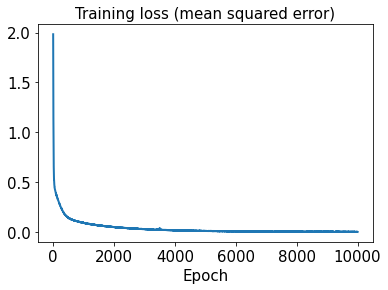

In [22]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

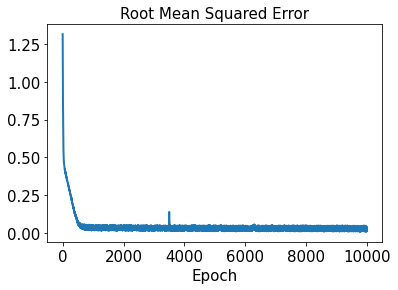

In [23]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
decoded_sensor_train1 = sensor_pred1.predict(t_train)

In [25]:
decoded_sensor_test1 = sensor_pred1.predict(t_test)

In [26]:
error_train_abs1 = np.abs(decoded_sensor_train1 - x_train1)

In [27]:
error_test_abs1 = np.abs(decoded_sensor_test1 - x_test1)

In [28]:
l2_error_sensor_train1 = np.sqrt(np.sum((decoded_sensor_train1 - x_train1)**2) / np.sum(x_train1**2))
print(l2_error_sensor_train1)

0.29350629205204126


In [29]:
l2_error_sensor_test1 = np.sqrt(np.sum((decoded_sensor_test1 - x_test1)**2) / np.sum(x_test1**2))
print(l2_error_sensor_test1)

0.31981946674406386


In [30]:
sensor_pred2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [31]:
start2 = datetime.datetime.now()
history2 = sensor_pred2.fit(t_train, x_train2, epochs=10000)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 13ms/step - loss: 2.5839 - rmse: 1.6072
Epoch 2/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.5134 - rmse: 1.5851
Epoch 3/10000
2/2 [==============================] - 0s 21ms/step - loss: 2.4850 - rmse: 1.5761
Epoch 4/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.4720 - rmse: 1.5720
Epoch 5/10000
2/2 [==============================] - 0s 29ms/step - loss: 2.4655 - rmse: 1.5699
Epoch 6/10000
2/2 [==============================] - 0s 20ms/step - loss: 2.4589 - rmse: 1.5678
Epoch 7/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4480 - rmse: 1.5643
Epoch 8/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.4368 - rmse: 1.5608
Epoch 9/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4275 - rmse: 1.5578
Epoch 10/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.4176 - rmse: 1.5546
Epoch 11/10000
2/2 [=====================

2/2 [==============================] - 0s 7ms/step - loss: 1.8656 - rmse: 1.3655
Epoch 87/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8566 - rmse: 1.3622
Epoch 88/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8497 - rmse: 1.3597
Epoch 89/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8475 - rmse: 1.3589
Epoch 90/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8353 - rmse: 1.3544
Epoch 91/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8283 - rmse: 1.3518
Epoch 92/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8215 - rmse: 1.3493
Epoch 93/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8210 - rmse: 1.3491
Epoch 94/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8112 - rmse: 1.3455
Epoch 95/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8033 - rmse: 1.3425
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 11ms/step - loss: 1.3105 - rmse: 1.1444
Epoch 171/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3058 - rmse: 1.1423
Epoch 172/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2964 - rmse: 1.1382
Epoch 173/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2942 - rmse: 1.1373
Epoch 174/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2882 - rmse: 1.1346
Epoch 175/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2824 - rmse: 1.1320
Epoch 176/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2697 - rmse: 1.1265
Epoch 177/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2630 - rmse: 1.1235
Epoch 178/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2622 - rmse: 1.1231
Epoch 179/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2518 - rmse: 1.1185
Epoch 180/10000
2/2 [===================

2/2 [==============================] - 0s 11ms/step - loss: 0.8329 - rmse: 0.9122
Epoch 255/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8283 - rmse: 0.9097
Epoch 256/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8244 - rmse: 0.9075
Epoch 257/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8186 - rmse: 0.9043
Epoch 258/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8141 - rmse: 0.9018
Epoch 259/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8139 - rmse: 0.9017
Epoch 260/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8031 - rmse: 0.8957
Epoch 261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8038 - rmse: 0.8961
Epoch 262/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7988 - rmse: 0.8933
Epoch 263/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7893 - rmse: 0.8880
Epoch 264/10000
2/2 [==================

2/2 [==============================] - 0s 11ms/step - loss: 0.4650 - rmse: 0.6813
Epoch 339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4619 - rmse: 0.6791
Epoch 340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4629 - rmse: 0.6798
Epoch 341/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4565 - rmse: 0.6751
Epoch 342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4581 - rmse: 0.6762
Epoch 343/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4503 - rmse: 0.6704
Epoch 344/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4452 - rmse: 0.6666
Epoch 345/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4401 - rmse: 0.6628
Epoch 346/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4427 - rmse: 0.6648
Epoch 347/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4361 - rmse: 0.6598
Epoch 348/10000
2/2 [==================

2/2 [==============================] - 0s 11ms/step - loss: 0.2441 - rmse: 0.4932
Epoch 423/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2375 - rmse: 0.4866
Epoch 424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2368 - rmse: 0.4858
Epoch 425/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2338 - rmse: 0.4827
Epoch 426/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2299 - rmse: 0.4786
Epoch 427/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2292 - rmse: 0.4779
Epoch 428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2279 - rmse: 0.4766
Epoch 429/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2250 - rmse: 0.4735
Epoch 430/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2247 - rmse: 0.4732
Epoch 431/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2241 - rmse: 0.4725
Epoch 432/10000
2/2 [==================

2/2 [==============================] - 0s 8ms/step - loss: 0.1127 - rmse: 0.3345
Epoch 507/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1131 - rmse: 0.3351
Epoch 508/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1103 - rmse: 0.3310
Epoch 509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1136 - rmse: 0.3359
Epoch 510/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1088 - rmse: 0.3287
Epoch 511/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1057 - rmse: 0.3239
Epoch 512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1033 - rmse: 0.3202
Epoch 513/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1070 - rmse: 0.3259
Epoch 514/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1030 - rmse: 0.3197
Epoch 515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1005 - rmse: 0.3158
Epoch 516/10000
2/2 [===================

2/2 [==============================] - 0s 13ms/step - loss: 0.0471 - rmse: 0.2152
Epoch 591/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0516 - rmse: 0.2254
Epoch 592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0466 - rmse: 0.2140
Epoch 593/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0438 - rmse: 0.2074
Epoch 594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0440 - rmse: 0.2078
Epoch 595/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0456 - rmse: 0.2119
Epoch 596/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0415 - rmse: 0.2018
Epoch 597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0425 - rmse: 0.2044
Epoch 598/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0451 - rmse: 0.2106
Epoch 599/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0434 - rmse: 0.2064
Epoch 600/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 0.0165 - rmse: 0.1254
Epoch 675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0161 - rmse: 0.1239
Epoch 676/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0159 - rmse: 0.1232
Epoch 677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0172 - rmse: 0.1283
Epoch 678/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0192 - rmse: 0.1358
Epoch 679/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0176 - rmse: 0.1297
Epoch 680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0199 - rmse: 0.1385
Epoch 681/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0181 - rmse: 0.1317
Epoch 682/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0162 - rmse: 0.1242
Epoch 683/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0148 - rmse: 0.1188
Epoch 684/10000
2/2 [===================

2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0749
Epoch 759/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0757
Epoch 760/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0897
Epoch 761/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0117 - rmse: 0.1050
Epoch 762/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0088 - rmse: 0.0901
Epoch 763/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0737
Epoch 764/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0875
Epoch 765/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0748
Epoch 766/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0119 - rmse: 0.1059
Epoch 767/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0699
Epoch 768/10000
2/2 [==================

2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0633
Epoch 843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0501
Epoch 844/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0856
Epoch 845/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0876
Epoch 846/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0441
Epoch 847/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0791
Epoch 848/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0699
Epoch 849/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0580
Epoch 850/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - rmse: 0.0940
Epoch 851/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0531
Epoch 852/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0367
Epoch 927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0490
Epoch 928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0688
Epoch 929/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0331
Epoch 930/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0294
Epoch 931/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0454
Epoch 932/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0538
Epoch 933/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0496
Epoch 934/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0346
Epoch 935/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0334
Epoch 936/10000
2/2 [==================

2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0495
Epoch 1010/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0621
Epoch 1011/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0080 - rmse: 0.0855
Epoch 1012/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0586
Epoch 1013/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0440
Epoch 1014/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0387
Epoch 1015/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0083 - rmse: 0.0870
Epoch 1016/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0480
Epoch 1017/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0530
Epoch 1018/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0838
Epoch 1019/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0804
Epoch 1093/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0661
Epoch 1094/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0468
Epoch 1095/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0516
Epoch 1096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0586
Epoch 1097/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0087 - rmse: 0.0895
Epoch 1098/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0250
Epoch 1099/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0033 - rmse: 0.0512
Epoch 1100/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0395
Epoch 1101/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0357
Epoch 1102/10000
2/2 [==========

2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0462
Epoch 1176/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0673
Epoch 1177/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0073 - rmse: 0.0813
Epoch 1178/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0346
Epoch 1179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0690
Epoch 1180/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0492
Epoch 1181/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0511
Epoch 1182/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0461
Epoch 1183/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0820
Epoch 1184/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0088 - rmse: 0.0904
Epoch 1185/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0379
Epoch 1259/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.6791e-04 - rmse: 0.0184
Epoch 1260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0819
Epoch 1261/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0265
Epoch 1262/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.3357e-04 - rmse: 0.0143
Epoch 1263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0395
Epoch 1264/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.8907e-04 - rmse: 0.0162
Epoch 1265/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0083 - rmse: 0.0876
Epoch 1266/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0249
Epoch 1267/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0611
Epoch 1268/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0350
Epoch 1342/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0349
Epoch 1343/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0611
Epoch 1344/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0396
Epoch 1345/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0213
Epoch 1346/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0612
Epoch 1347/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0618
Epoch 1348/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0405
Epoch 1349/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0387
Epoch 1350/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.6542e-04 - rmse: 0.0188
Epoch 1351/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0340
Epoch 1425/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0547
Epoch 1426/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0871
Epoch 1427/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0065 - rmse: 0.0766
Epoch 1428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0819
Epoch 1429/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0691
Epoch 1430/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0452
Epoch 1431/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0795
Epoch 1432/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0531
Epoch 1433/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0679
Epoch 1434/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0475
Epoch 1507/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0288
Epoch 1508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0300
Epoch 1509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0748
Epoch 1510/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.3726e-04 - rmse: 0.0188
Epoch 1511/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0205
Epoch 1512/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0076 - rmse: 0.0837
Epoch 1513/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0765
Epoch 1514/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4251e-04 - rmse: 0.0190
Epoch 1515/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0841
Epoch 1516/10000
2/2 [

Epoch 1589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0481
Epoch 1590/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0495
Epoch 1591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0238
Epoch 1592/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0070 - rmse: 0.0803
Epoch 1593/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0079 - rmse: 0.0855
Epoch 1594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0606
Epoch 1595/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0090 - rmse: 0.0917
Epoch 1596/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0058 - rmse: 0.0720
Epoch 1597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0078 - rmse: 0.0853
Epoch 1598/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0271
Epoch 1599/10

2/2 [==============================] - 0s 13ms/step - loss: 0.0049 - rmse: 0.0662
Epoch 1672/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0774
Epoch 1673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0652
Epoch 1674/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0416
Epoch 1675/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0094 - rmse: 0.0942
Epoch 1676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0815
Epoch 1677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0885
Epoch 1678/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0723
Epoch 1679/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0684
Epoch 1680/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0505
Epoch 1681/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0294
Epoch 1754/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0780
Epoch 1755/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0420
Epoch 1756/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0540
Epoch 1757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0570
Epoch 1758/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0620
Epoch 1759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0579
Epoch 1760/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0401
Epoch 1761/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0427
Epoch 1762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0553
Epoch 1763/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0597
Epoch 1836/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0519
Epoch 1837/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0643
Epoch 1838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0484
Epoch 1839/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0236
Epoch 1840/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0437
Epoch 1841/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0068 - rmse: 0.0792
Epoch 1842/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0875
Epoch 1843/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0873
Epoch 1844/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0609
Epoch 1845/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0395
Epoch 1918/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0522
Epoch 1919/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0504
Epoch 1920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0436
Epoch 1921/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0627
Epoch 1922/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0508
Epoch 1923/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0225
Epoch 1924/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0090 - rmse: 0.0923
Epoch 1925/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0642
Epoch 1926/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0335
Epoch 1927/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0572
Epoch 2000/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0898
Epoch 2001/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0809
Epoch 2002/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0522
Epoch 2003/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0645
Epoch 2004/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0663
Epoch 2005/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0491
Epoch 2006/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0588
Epoch 2007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0745
Epoch 2008/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0463
Epoch 2009/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0265
Epoch 2082/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0376
Epoch 2083/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0681
Epoch 2084/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0492
Epoch 2085/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0417
Epoch 2086/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0403
Epoch 2087/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0375
Epoch 2088/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0757
Epoch 2089/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0306
Epoch 2090/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.3310e-04 - rmse: 0.0157
Epoch 2091/10000
2/2 [=====

Epoch 2164/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0681
Epoch 2165/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0575
Epoch 2166/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0848
Epoch 2167/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0558
Epoch 2168/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0789
Epoch 2169/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0626
Epoch 2170/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0704
Epoch 2171/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0592
Epoch 2172/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0458
Epoch 2173/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0436
Epoch 2174/10

2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0803
Epoch 2247/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.7006e-04 - rmse: 0.0176
Epoch 2248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0239
Epoch 2249/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0054 - rmse: 0.0704
Epoch 2250/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0416
Epoch 2251/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0802
Epoch 2252/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0795
Epoch 2253/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0301
Epoch 2254/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0806
Epoch 2255/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0582
Epoch 2256/10000
2/2 [====

2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0307
Epoch 2329/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0345
Epoch 2330/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.7825e-04 - rmse: 0.0151
Epoch 2331/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0059 - rmse: 0.0735
Epoch 2332/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0693
Epoch 2333/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.0178e-04 - rmse: 0.0188
Epoch 2334/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0808
Epoch 2335/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0422
Epoch 2336/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0567
Epoch 2337/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.4538e-04 - rmse: 0.0199
Epoch 2338/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 9.4628e-04 - rmse: 0.0226
Epoch 2411/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0840
Epoch 2412/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.6198e-04 - rmse: 0.0229
Epoch 2413/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.8733e-04 - rmse: 0.0123
Epoch 2414/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0448
Epoch 2415/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0789
Epoch 2416/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0508
Epoch 2417/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0756
Epoch 2418/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0475
Epoch 2419/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0824
Epoch 2420/10000
2/

2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0660
Epoch 2493/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0363
Epoch 2494/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0409
Epoch 2495/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0329
Epoch 2496/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0350
Epoch 2497/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0527
Epoch 2498/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0803
Epoch 2499/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0345
Epoch 2500/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0362
Epoch 2501/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0409
Epoch 2502/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0903
Epoch 2576/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0595
Epoch 2577/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0387
Epoch 2578/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0877
Epoch 2579/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0095 - rmse: 0.0951
Epoch 2580/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0659
Epoch 2581/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0039 - rmse: 0.0587
Epoch 2582/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0083 - rmse: 0.0886
Epoch 2583/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0598
Epoch 2584/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0792
Epoch 2585/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0614
Epoch 2658/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0414
Epoch 2659/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0390
Epoch 2660/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0646
Epoch 2661/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0292
Epoch 2662/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0310
Epoch 2663/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0079 - rmse: 0.0864
Epoch 2664/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0364
Epoch 2665/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0473
Epoch 2666/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0266
Epoch 2667/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0470
Epoch 2740/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0444
Epoch 2741/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0733
Epoch 2742/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0640
Epoch 2743/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0492
Epoch 2744/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0300
Epoch 2745/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0333
Epoch 2746/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.8194e-04 - rmse: 0.0199
Epoch 2747/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0332
Epoch 2748/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4870e-04 - rmse: 0.0079
Epoch 2749/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 8.3980e-04 - rmse: 0.0215
Epoch 2822/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0254
Epoch 2823/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.6381e-04 - rmse: 0.0243
Epoch 2824/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0502
Epoch 2825/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0571
Epoch 2826/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0402
Epoch 2827/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0752
Epoch 2828/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0461
Epoch 2829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0410
Epoch 2830/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0705
Epoch 2831/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0510
Epoch 2904/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7907e-04 - rmse: 0.0107
Epoch 2905/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.9949e-04 - rmse: 0.0183
Epoch 2906/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.3798e-04 - rmse: 0.0132
Epoch 2907/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0423
Epoch 2908/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0878
Epoch 2909/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0756
Epoch 2910/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0731
Epoch 2911/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0693
Epoch 2912/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0444
Epoch 2913/10000
2/

2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0424
Epoch 2986/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0262
Epoch 2987/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0336
Epoch 2988/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0387
Epoch 2989/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0563
Epoch 2990/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0058 - rmse: 0.0736
Epoch 2991/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0079 - rmse: 0.0869
Epoch 2992/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.9166e-04 - rmse: 0.0209
Epoch 2993/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0526
Epoch 2994/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6826e-04 - rmse: 0.0107
Epoch 2995/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0587
Epoch 3068/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0257
Epoch 3069/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.6692e-04 - rmse: 0.0206
Epoch 3070/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0615
Epoch 3071/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0433
Epoch 3072/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0603
Epoch 3073/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0433
Epoch 3074/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0560
Epoch 3075/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0285
Epoch 3076/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.1710e-04 - rmse: 0.0218
Epoch 3077/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0595
Epoch 3150/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0751
Epoch 3151/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0484
Epoch 3152/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0770
Epoch 3153/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7709e-04 - rmse: 0.0211
Epoch 3154/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0468
Epoch 3155/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0593
Epoch 3156/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0679
Epoch 3157/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0809
Epoch 3158/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0415
Epoch 3159/10000
2/2 [====

2/2 [==============================] - 0s 10ms/step - loss: 0.0079 - rmse: 0.0871
Epoch 3232/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0780
Epoch 3233/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0534
Epoch 3234/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0321
Epoch 3235/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0546
Epoch 3236/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0552
Epoch 3237/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0780
Epoch 3238/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0771
Epoch 3239/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0503
Epoch 3240/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0435
Epoch 3241/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0450
Epoch 3314/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0615
Epoch 3315/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0371
Epoch 3316/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0792
Epoch 3317/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0312
Epoch 3318/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0487
Epoch 3319/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0662
Epoch 3320/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0409
Epoch 3321/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.9053e-04 - rmse: 0.0194
Epoch 3322/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.4370e-04 - rmse: 0.0251
Epoch 3323/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0888
Epoch 3396/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0831
Epoch 3397/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0621
Epoch 3398/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0487e-04 - rmse: 0.0224
Epoch 3399/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.8365e-04 - rmse: 0.0219
Epoch 3400/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.2697e-04 - rmse: 0.0229
Epoch 3401/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0848
Epoch 3402/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.4242e-04 - rmse: 0.0184
Epoch 3403/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0631
Epoch 3404/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 3405/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0503
Epoch 3478/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0659
Epoch 3479/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0428
Epoch 3480/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0848
Epoch 3481/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0602
Epoch 3482/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0488
Epoch 3483/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0564
Epoch 3484/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.7511e-04 - rmse: 0.0134
Epoch 3485/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0787
Epoch 3486/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2189e-04 - rmse: 0.0113
Epoch 3487/10000
2/2 [==

2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0570
Epoch 3560/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0077 - rmse: 0.0862
Epoch 3561/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0563
Epoch 3562/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0567
Epoch 3563/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0366
Epoch 3564/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0654
Epoch 3565/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0269
Epoch 3566/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0831
Epoch 3567/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0270
Epoch 3568/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0817
Epoch 3569/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0571
Epoch 3642/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0848
Epoch 3643/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0398
Epoch 3644/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0750
Epoch 3645/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0458
Epoch 3646/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0443
Epoch 3647/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0435
Epoch 3648/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8229e-04 - rmse: 0.0144
Epoch 3649/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0384
Epoch 3650/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0815
Epoch 3651/10000
2/2 [====

2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0826
Epoch 3724/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0474
Epoch 3725/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0387
Epoch 3726/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0725
Epoch 3727/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0743
Epoch 3728/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0072 - rmse: 0.0830
Epoch 3729/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.1609e-04 - rmse: 0.0187
Epoch 3730/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0874
Epoch 3731/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0324
Epoch 3732/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0017e-04 - rmse: 0.0182
Epoch 3733/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0373
Epoch 3806/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0739
Epoch 3807/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0683e-04 - rmse: 0.0157
Epoch 3808/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.9855e-04 - rmse: 0.0118
Epoch 3809/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.1892e-04 - rmse: 0.0257
Epoch 3810/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0774
Epoch 3811/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0462
Epoch 3812/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.9945e-04 - rmse: 0.0184
Epoch 3813/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1235e-04 - rmse: 0.0124
Epoch 3814/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.9665e-04 - rmse: 0.0117
Epoch 3

2/2 [==============================] - 0s 8ms/step - loss: 9.8548e-04 - rmse: 0.0271
Epoch 3888/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0613
Epoch 3889/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0860
Epoch 3890/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0296
Epoch 3891/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0331
Epoch 3892/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 3893/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0480
Epoch 3894/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0319
Epoch 3895/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0087 - rmse: 0.0921
Epoch 3896/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0811
Epoch 3897/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 7.0875e-04 - rmse: 0.0215
Epoch 3970/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0834
Epoch 3971/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0794
Epoch 3972/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0338
Epoch 3973/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0762
Epoch 3974/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0610
Epoch 3975/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0731
Epoch 3976/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0601
Epoch 3977/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0726
Epoch 3978/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0519
Epoch 3979/10000
2/2 [====

2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 4052/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0792
Epoch 4053/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0308
Epoch 4054/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.9806e-04 - rmse: 0.0276
Epoch 4055/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0616
Epoch 4056/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0524
Epoch 4057/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0485
Epoch 4058/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1571e-04 - rmse: 0.0167
Epoch 4059/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.5299e-04 - rmse: 0.0268
Epoch 4060/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0818
Epoch 4061/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 6.3341e-04 - rmse: 0.0201
Epoch 4134/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0727
Epoch 4135/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0747
Epoch 4136/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.8123e-04 - rmse: 0.0123
Epoch 4137/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0390
Epoch 4138/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.5361e-04 - rmse: 0.0150
Epoch 4139/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0334
Epoch 4140/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0302
Epoch 4141/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0783
Epoch 4142/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0627
Epoch 4143/10000
2

2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0559
Epoch 4216/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0282
Epoch 4217/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0855
Epoch 4218/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0618
Epoch 4219/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0403
Epoch 4220/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0779
Epoch 4221/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0304
Epoch 4222/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.7297e-04 - rmse: 0.0235
Epoch 4223/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0627
Epoch 4224/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0851
Epoch 4225/10000
2/2 [====

2/2 [==============================] - 0s 12ms/step - loss: 7.7907e-04 - rmse: 0.0237
Epoch 4298/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0521
Epoch 4299/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0080 - rmse: 0.0880
Epoch 4300/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 4301/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0532
Epoch 4302/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0519
Epoch 4303/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.9451e-04 - rmse: 0.0134
Epoch 4304/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0657
Epoch 4305/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0321
Epoch 4306/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0568
Epoch 4307/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0345
Epoch 4380/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0336
Epoch 4381/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8861e-04 - rmse: 0.0134
Epoch 4382/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7095e-04 - rmse: 0.0127
Epoch 4383/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0467
Epoch 4384/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0363
Epoch 4385/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0430
Epoch 4386/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0392
Epoch 4387/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0642
Epoch 4388/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0598
Epoch 4389/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0874
Epoch 4462/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0078 - rmse: 0.0869
Epoch 4463/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0500
Epoch 4464/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0720
Epoch 4465/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0787
Epoch 4466/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0385
Epoch 4467/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0801
Epoch 4468/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0085 - rmse: 0.0911
Epoch 4469/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0072 - rmse: 0.0836
Epoch 4470/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0064 - rmse: 0.0786
Epoch 4471/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0655
Epoch 4544/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0285
Epoch 4545/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0736
Epoch 4546/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0391
Epoch 4547/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2118e-04 - rmse: 0.0150
Epoch 4548/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0827
Epoch 4549/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0428
Epoch 4550/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0363
Epoch 4551/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0497
Epoch 4552/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.8065e-04 - rmse: 0.0242
Epoch 4553/10000
2/2 [

2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0377
Epoch 4626/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0480
Epoch 4627/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.3862e-04 - rmse: 0.0211
Epoch 4628/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.2738e-04 - rmse: 0.0154
Epoch 4629/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0650
Epoch 4630/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0521
Epoch 4631/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0345
Epoch 4632/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0667
Epoch 4633/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.9441e-04 - rmse: 0.0224
Epoch 4634/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.6171e-04 - rmse: 0.0259
Epoch 4635/1000

2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0478
Epoch 4708/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0760
Epoch 4709/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0483
Epoch 4710/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0361
Epoch 4711/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0373
Epoch 4712/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0373
Epoch 4713/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0307
Epoch 4714/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0412
Epoch 4715/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0303
Epoch 4716/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0076 - rmse: 0.0859
Epoch 4717/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0794
Epoch 4790/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0325
Epoch 4791/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0315
Epoch 4792/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0736
Epoch 4793/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0509
Epoch 4794/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0619
Epoch 4795/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.4123e-04 - rmse: 0.0190
Epoch 4796/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0744
Epoch 4797/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0570
Epoch 4798/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0617
Epoch 4799/10000
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 8.5937e-04 - rmse: 0.0262
Epoch 4872/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0364
Epoch 4873/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0081 - rmse: 0.0888
Epoch 4874/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0756
Epoch 4875/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.9032e-04 - rmse: 0.0204
Epoch 4876/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0804
Epoch 4877/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4643e-04 - rmse: 0.0278
Epoch 4878/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0325
Epoch 4879/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0809
Epoch 4880/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0365
Epoch 4881/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 9.7573e-04 - rmse: 0.0284
Epoch 4954/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0571
Epoch 4955/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0879
Epoch 4956/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0702
Epoch 4957/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.6729e-04 - rmse: 0.0173
Epoch 4958/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0651
Epoch 4959/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.2177e-04 - rmse: 0.0274
Epoch 4960/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0791
Epoch 4961/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.3073e-04 - rmse: 0.0190
Epoch 4962/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.0352e-04 - rmse: 0.0116
Epoch 4963/

2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0394
Epoch 5036/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0795
Epoch 5037/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.8485e-04 - rmse: 0.0268
Epoch 5038/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0608
Epoch 5039/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0704
Epoch 5040/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0310
Epoch 5041/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0297
Epoch 5042/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0540
Epoch 5043/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0074 - rmse: 0.0850
Epoch 5044/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0511
Epoch 5045/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0298
Epoch 5118/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0387
Epoch 5119/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0470
Epoch 5120/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0631
Epoch 5121/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0883
Epoch 5122/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0495
Epoch 5123/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0792
Epoch 5124/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0821
Epoch 5125/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0353
Epoch 5126/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5078e-04 - rmse: 0.0138
Epoch 5127/10000
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 9.8617e-04 - rmse: 0.0288
Epoch 5200/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0562
Epoch 5201/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0824
Epoch 5202/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.6501e-04 - rmse: 0.0203
Epoch 5203/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0342
Epoch 5204/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.2544e-04 - rmse: 0.0193
Epoch 5205/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0549e-04 - rmse: 0.0187
Epoch 5206/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0464
Epoch 5207/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0621
Epoch 5208/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0629
Epoch 5209/1000

2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0773
Epoch 5282/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3918e-04 - rmse: 0.0094
Epoch 5283/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.6392e-04 - rmse: 0.0227
Epoch 5284/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0687
Epoch 5285/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.4290e-04 - rmse: 0.0139
Epoch 5286/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0312
Epoch 5287/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6986e-04 - rmse: 0.0228
Epoch 5288/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0569
Epoch 5289/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.8068e-04 - rmse: 0.0152
Epoch 5290/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.6079e-04 - rmse: 0.0176
Epoch 5

2/2 [==============================] - 0s 13ms/step - loss: 0.0053 - rmse: 0.0717
Epoch 5364/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0676
Epoch 5365/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0789
Epoch 5366/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0445
Epoch 5367/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0741
Epoch 5368/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.3444e-04 - rmse: 0.0221
Epoch 5369/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.9650e-04 - rmse: 0.0187
Epoch 5370/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0400
Epoch 5371/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0669
Epoch 5372/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0372
Epoch 5373/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0896
Epoch 5446/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0395
Epoch 5447/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7971e-04 - rmse: 0.0154
Epoch 5448/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0807
Epoch 5449/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0712
Epoch 5450/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0650
Epoch 5451/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0058 - rmse: 0.0752
Epoch 5452/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.7102e-04 - rmse: 0.0207
Epoch 5453/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0596
Epoch 5454/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0823
Epoch 5455/10000
2/2 [==

2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0372
Epoch 5528/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0462
Epoch 5529/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0070 - rmse: 0.0827
Epoch 5530/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.5027e-04 - rmse: 0.0146
Epoch 5531/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0566
Epoch 5532/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0817
Epoch 5533/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0668
Epoch 5534/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0569
Epoch 5535/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.4899e-04 - rmse: 0.0106
Epoch 5536/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0692
Epoch 5537/10000
2/2 [

2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0495
Epoch 5610/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 5611/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0504
Epoch 5612/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0625
Epoch 5613/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0295
Epoch 5614/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0408
Epoch 5615/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0404
Epoch 5616/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0375
Epoch 5617/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0496
Epoch 5618/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0527
Epoch 5619/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 5692/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4586e-04 - rmse: 0.0108
Epoch 5693/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0492e-04 - rmse: 0.0133
Epoch 5694/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5782e-04 - rmse: 0.0113
Epoch 5695/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3012e-04 - rmse: 0.0101
Epoch 5696/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0686
Epoch 5697/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0482
Epoch 5698/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0437
Epoch 5699/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0741
Epoch 5700/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0518
Epoch 5701/1000

Epoch 5773/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0598
Epoch 5774/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0736
Epoch 5775/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0482
Epoch 5776/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0494
Epoch 5777/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0566
Epoch 5778/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0043 - rmse: 0.0645
Epoch 5779/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0784
Epoch 5780/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 5781/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.8091e-04 - rmse: 0.0256
Epoch 5782/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0883
Epoch 578

2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0645
Epoch 5856/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0726
Epoch 5857/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0633
Epoch 5858/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0501
Epoch 5859/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.6892e-04 - rmse: 0.0211
Epoch 5860/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0652
Epoch 5861/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.1624e-04 - rmse: 0.0139
Epoch 5862/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0296
Epoch 5863/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 5864/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0662
Epoch 5865/10000
2/2 [

2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0836
Epoch 5938/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0033 - rmse: 0.0566
Epoch 5939/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0838
Epoch 5940/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0580
Epoch 5941/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0736
Epoch 5942/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0755
Epoch 5943/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 5944/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0620
Epoch 5945/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0884
Epoch 5946/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0399
Epoch 5947/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0486
Epoch 6020/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.8874e-04 - rmse: 0.0131
Epoch 6021/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0524
Epoch 6022/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 6023/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0077 - rmse: 0.0871
Epoch 6024/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4282e-04 - rmse: 0.0112
Epoch 6025/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0796
Epoch 6026/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0694
Epoch 6027/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0574
Epoch 6028/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0581
Epoch 6029/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0685
Epoch 6102/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0811
Epoch 6103/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8550e-04 - rmse: 0.0165
Epoch 6104/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0520
Epoch 6105/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0684
Epoch 6106/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0495
Epoch 6107/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.9480e-04 - rmse: 0.0261
Epoch 6108/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.1352e-04 - rmse: 0.0173
Epoch 6109/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.2821e-04 - rmse: 0.0248
Epoch 6110/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0849
Epoch 6111/100

2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0510
Epoch 6184/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0734
Epoch 6185/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0552
Epoch 6186/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0344
Epoch 6187/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0895e-04 - rmse: 0.0141
Epoch 6188/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0558
Epoch 6189/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7435e-04 - rmse: 0.0128
Epoch 6190/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0795
Epoch 6191/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 6192/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.3890e-04 - rmse: 0.0151
Epoch 6193/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0812
Epoch 6266/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0477
Epoch 6267/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0507
Epoch 6268/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0725
Epoch 6269/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 6270/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0734
Epoch 6271/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0395
Epoch 6272/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0859
Epoch 6273/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0887
Epoch 6274/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0884
Epoch 6275/10000
2/2 [========

Epoch 6348/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0802
Epoch 6349/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0859
Epoch 6350/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0372
Epoch 6351/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0836
Epoch 6352/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.3348e-04 - rmse: 0.0251
Epoch 6353/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0458
Epoch 6354/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0656
Epoch 6355/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0412
Epoch 6356/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0627
Epoch 6357/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0320
Epoch 635

2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0885
Epoch 6431/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 6432/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6775e-04 - rmse: 0.0163
Epoch 6433/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0370
Epoch 6434/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0637
Epoch 6435/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0579
Epoch 6436/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0423
Epoch 6437/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 6438/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7686e-04 - rmse: 0.0194
Epoch 6439/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.8956e-04 - rmse: 0.0262
Epoch 6440/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 6.5814e-04 - rmse: 0.0236
Epoch 6513/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0861
Epoch 6514/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0741
Epoch 6515/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0422
Epoch 6516/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0044 - rmse: 0.0654
Epoch 6517/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0532
Epoch 6518/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 6519/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0562
Epoch 6520/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0805
Epoch 6521/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0711
Epoch 6522/10000
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0735
Epoch 6596/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0049 - rmse: 0.0695
Epoch 6597/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0556
Epoch 6598/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0395
Epoch 6599/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0568
Epoch 6600/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.6008e-04 - rmse: 0.0215
Epoch 6601/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0593
Epoch 6602/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 6603/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 6604/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0348
Epoch 6605/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0414
Epoch 6678/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 6679/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.6678e-04 - rmse: 0.0217
Epoch 6680/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0789
Epoch 6681/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.4497e-04 - rmse: 0.0212
Epoch 6682/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0422e-04 - rmse: 0.0247
Epoch 6683/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.9927e-04 - rmse: 0.0201
Epoch 6684/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 6685/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0753
Epoch 6686/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.3701e-04 - rmse: 0.0290
Epoch 6687

2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0536
Epoch 6760/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0579
Epoch 6761/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0591
Epoch 6762/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0754
Epoch 6763/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0489
Epoch 6764/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 6765/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0437
Epoch 6766/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 6767/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0611
Epoch 6768/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0613
Epoch 6769/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0655
Epoch 6843/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0468
Epoch 6844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0675
Epoch 6845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0343
Epoch 6846/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0531
Epoch 6847/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 6848/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0664
Epoch 6849/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0413
Epoch 6850/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0884
Epoch 6851/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0714
Epoch 6852/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 2.6101e-04 - rmse: 0.0132
Epoch 6925/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0518
Epoch 6926/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 6927/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.8981e-04 - rmse: 0.0265
Epoch 6928/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0565e-04 - rmse: 0.0109
Epoch 6929/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.0657e-04 - rmse: 0.0179
Epoch 6930/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0685
Epoch 6931/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0566
Epoch 6932/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0508
Epoch 6933/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0509
Epoch 6934/100

2/2 [==============================] - 0s 12ms/step - loss: 9.8602e-04 - rmse: 0.0300
Epoch 7007/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0833
Epoch 7008/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.8958e-04 - rmse: 0.0284
Epoch 7009/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0527
Epoch 7010/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0615
Epoch 7011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 7012/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.3625e-04 - rmse: 0.0188
Epoch 7013/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0541
Epoch 7014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 7015/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0461
Epoch 7016/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 4.7337e-04 - rmse: 0.0198
Epoch 7088/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0890
Epoch 7089/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 7090/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.1539e-04 - rmse: 0.0208
Epoch 7091/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 7092/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 7093/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0081 - rmse: 0.0894
Epoch 7094/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0744
Epoch 7095/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 7096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0698
Epoch 7097/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 7170/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0311
Epoch 7171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0329
Epoch 7172/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0694
Epoch 7173/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0490
Epoch 7174/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0813
Epoch 7175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0085 - rmse: 0.0916
Epoch 7176/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 7177/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 7178/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0309
Epoch 7179/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0582
Epoch 7252/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 7253/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 7254/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0749
Epoch 7255/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.2661e-04 - rmse: 0.0291
Epoch 7256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0527
Epoch 7257/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0585e-04 - rmse: 0.0151
Epoch 7258/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0785
Epoch 7259/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0686
Epoch 7260/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0686
Epoch 7261/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0647
Epoch 7334/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 7335/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 7336/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0640
Epoch 7337/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 7338/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0400
Epoch 7339/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.8417e-04 - rmse: 0.0144
Epoch 7340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 7341/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0831
Epoch 7342/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0456
Epoch 7343/10000
2/2 [====

2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 7416/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0885
Epoch 7417/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.4476e-04 - rmse: 0.0239
Epoch 7418/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.3694e-04 - rmse: 0.0257
Epoch 7419/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 7420/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 7421/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.0575e-04 - rmse: 0.0251
Epoch 7422/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0082 - rmse: 0.0900
Epoch 7423/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 7424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 7425/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 7498/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.9143e-04 - rmse: 0.0286
Epoch 7499/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0437
Epoch 7500/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0548
Epoch 7501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0917
Epoch 7502/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0801
Epoch 7503/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 7504/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0532
Epoch 7505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0744
Epoch 7506/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0527
Epoch 7507/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 4.6834e-04 - rmse: 0.0199
Epoch 7580/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0817
Epoch 7581/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 7582/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.2942e-04 - rmse: 0.0275
Epoch 7583/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0851
Epoch 7584/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0824
Epoch 7585/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.5101e-04 - rmse: 0.0219
Epoch 7586/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0025e-04 - rmse: 0.0207
Epoch 7587/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0798
Epoch 7588/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0642
Epoch 7589/100

2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0414
Epoch 7662/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 7663/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 7664/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0836
Epoch 7665/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0694
Epoch 7666/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0691
Epoch 7667/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 7668/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0310
Epoch 7669/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 7670/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0069 - rmse: 0.0824
Epoch 7671/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0832
Epoch 7744/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0782
Epoch 7745/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.9084e-04 - rmse: 0.0205
Epoch 7746/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 7747/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0754
Epoch 7748/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 7749/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.3291e-04 - rmse: 0.0237
Epoch 7750/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0780
Epoch 7751/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0305
Epoch 7752/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0724
Epoch 7753/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 5.0438e-04 - rmse: 0.0209
Epoch 7826/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0695
Epoch 7827/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 7828/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0592
Epoch 7829/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.5973e-04 - rmse: 0.0222
Epoch 7830/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0813
Epoch 7831/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 7832/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9407e-04 - rmse: 0.0112
Epoch 7833/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 7834/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7968e-04 - rmse: 0.0203
Epoch 7835/100

2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0728
Epoch 7908/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8466e-04 - rmse: 0.0178
Epoch 7909/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0609
Epoch 7910/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0599
Epoch 7911/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 7912/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.9482e-04 - rmse: 0.0151
Epoch 7913/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0360
Epoch 7914/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.9887e-04 - rmse: 0.0231
Epoch 7915/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.4904e-04 - rmse: 0.0280
Epoch 7916/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 7917/100

2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 7989/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0869
Epoch 7990/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.2645e-04 - rmse: 0.0127
Epoch 7991/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.7577e-04 - rmse: 0.0105
Epoch 7992/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0594
Epoch 7993/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 7994/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0648
Epoch 7995/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 7996/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0388
Epoch 7997/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8778e-04 - rmse: 0.0111
Epoch 7998/10000
2

2/2 [==============================] - 0s 7ms/step - loss: 2.2476e-04 - rmse: 0.0127
Epoch 8071/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0549
Epoch 8072/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.7274e-04 - rmse: 0.0105
Epoch 8073/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 8074/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0502
Epoch 8075/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 8076/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 8077/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.4356e-04 - rmse: 0.0167
Epoch 8078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0611
Epoch 8079/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6266e-04 - rmse: 0.0141
Epoch 8080/1000

Epoch 8152/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0648
Epoch 8153/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0401
Epoch 8154/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0826
Epoch 8155/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 8156/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 8157/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0782
Epoch 8158/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 8159/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 8160/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 8161/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.8426e-04 - rmse: 0.0180
Epoch 816

2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 8235/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0576
Epoch 8236/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.5047e-04 - rmse: 0.0298
Epoch 8237/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.6848e-04 - rmse: 0.0266
Epoch 8238/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 8239/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 8240/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0812
Epoch 8241/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9140e-04 - rmse: 0.0270
Epoch 8242/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0567
Epoch 8243/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0548
Epoch 8244/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0692
Epoch 8317/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0744
Epoch 8318/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.7951e-04 - rmse: 0.0249
Epoch 8319/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 8320/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 8321/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 8322/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4293e-04 - rmse: 0.0196
Epoch 8323/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0513
Epoch 8324/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7538e-04 - rmse: 0.0204
Epoch 8325/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 8326/10000
2

2/2 [==============================] - 0s 13ms/step - loss: 1.9869e-04 - rmse: 0.0119
Epoch 8399/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.9245e-04 - rmse: 0.0252
Epoch 8400/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 8401/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0825
Epoch 8402/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0824
Epoch 8403/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0736
Epoch 8404/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0729
Epoch 8405/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 8406/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1143e-04 - rmse: 0.0124
Epoch 8407/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 8408/10000
2

Epoch 8480/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0374
Epoch 8481/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0877
Epoch 8482/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 8483/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0447
Epoch 8484/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0576
Epoch 8485/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2513e-04 - rmse: 0.0192
Epoch 8486/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0702
Epoch 8487/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0799
Epoch 8488/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 8489/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0678
Epoch 849

2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 8563/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0494
Epoch 8564/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0901
Epoch 8565/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 8566/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 8567/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 8568/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0663
Epoch 8569/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0757
Epoch 8570/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.9557e-04 - rmse: 0.0185
Epoch 8571/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 8572/10000
2/2 [=====

2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 8645/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0480
Epoch 8646/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 8647/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0390
Epoch 8648/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0788
Epoch 8649/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 8650/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.7871e-04 - rmse: 0.0180
Epoch 8651/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 8652/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 8653/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 8654/10000
2/2 [=====

Epoch 8726/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 8727/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0576
Epoch 8728/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0448
Epoch 8729/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.1938e-04 - rmse: 0.0277
Epoch 8730/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0415
Epoch 8731/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 8732/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.3515e-04 - rmse: 0.0261
Epoch 8733/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0316
Epoch 8734/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 8735/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0385
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 0.0083 - rmse: 0.0906
Epoch 8809/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 8810/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.1792e-04 - rmse: 0.0294
Epoch 8811/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0353
Epoch 8812/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 8813/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.4903e-04 - rmse: 0.0282
Epoch 8814/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0759
Epoch 8815/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0760
Epoch 8816/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 8817/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7906e-04 - rmse: 0.0207
Epoch 8818/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 8891/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0641
Epoch 8892/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0896
Epoch 8893/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0850
Epoch 8894/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0844
Epoch 8895/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 8896/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 8897/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0402
Epoch 8898/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5579e-04 - rmse: 0.0225
Epoch 8899/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0471
Epoch 8900/10000
2/2 [====

2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0787
Epoch 8973/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 8974/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0823
Epoch 8975/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.6848e-04 - rmse: 0.0286
Epoch 8976/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 8977/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0789
Epoch 8978/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 8979/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 8980/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.8641e-04 - rmse: 0.0154
Epoch 8981/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0737
Epoch 8982/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 2.9472e-04 - rmse: 0.0157
Epoch 9055/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1225e-04 - rmse: 0.0080
Epoch 9056/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0559
Epoch 9057/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 9058/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 9059/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3899e-04 - rmse: 0.0198
Epoch 9060/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0756
Epoch 9061/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 9062/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1769e-04 - rmse: 0.0164
Epoch 9063/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 9064/100

2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 9137/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0837
Epoch 9138/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 9139/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.4102e-04 - rmse: 0.0172
Epoch 9140/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0744
Epoch 9141/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0665
Epoch 9142/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 9143/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 9144/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0673
Epoch 9145/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 9146/10000
2/2 [====

2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 9219/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 9220/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 9221/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 9222/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 9223/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 9224/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 9225/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.4230e-04 - rmse: 0.0140
Epoch 9226/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 9227/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 9228/10000
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 5.6483e-04 - rmse: 0.0228
Epoch 9301/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0511
Epoch 9302/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0758
Epoch 9303/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8072e-04 - rmse: 0.0271
Epoch 9304/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 9305/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 9306/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 9307/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0886
Epoch 9308/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0503
Epoch 9309/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 9310/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 9383/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 9384/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 9385/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 9386/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0494
Epoch 9387/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0618
Epoch 9388/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0793
Epoch 9389/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 9390/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 9391/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0530
Epoch 9392/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0843
Epoch 9465/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 9466/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0761
Epoch 9467/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.6294e-04 - rmse: 0.0228
Epoch 9468/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0542e-04 - rmse: 0.0215
Epoch 9469/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0391
Epoch 9470/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 9471/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 9472/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0045 - rmse: 0.0667
Epoch 9473/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 9474/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 9547/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 9548/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9231e-04 - rmse: 0.0158
Epoch 9549/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 9550/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 9551/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0818
Epoch 9552/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 9553/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9334e-04 - rmse: 0.0123
Epoch 9554/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 9555/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4250e-04 - rmse: 0.0200
Epoch 9556/10000
2

2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0737
Epoch 9629/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.2407e-04 - rmse: 0.0168
Epoch 9630/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0789
Epoch 9631/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0523
Epoch 9632/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9147e-04 - rmse: 0.0123
Epoch 9633/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0063 - rmse: 0.0790
Epoch 9634/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0730
Epoch 9635/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.9913e-04 - rmse: 0.0236
Epoch 9636/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 9637/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 9638/10000
2

2/2 [==============================] - 0s 11ms/step - loss: 8.8729e-04 - rmse: 0.0291
Epoch 9711/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 9712/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0062 - rmse: 0.0783
Epoch 9713/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0560
Epoch 9714/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 9715/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 9716/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 9717/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1692e-04 - rmse: 0.0167
Epoch 9718/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 9719/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0578
Epoch 9720/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 2.4439e-04 - rmse: 0.0144
Epoch 9793/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 9794/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 9795/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 9796/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.8894e-04 - rmse: 0.0292
Epoch 9797/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0611
Epoch 9798/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.8586e-04 - rmse: 0.0212
Epoch 9799/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 9800/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 9801/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 9802/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 9875/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 9876/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9834e-04 - rmse: 0.0127
Epoch 9877/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 9878/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.0466e-04 - rmse: 0.0082
Epoch 9879/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 9880/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 9881/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 9882/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 9883/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.2375e-04 - rmse: 0.0169
Epoch 9884/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 9957/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 9958/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.9726e-04 - rmse: 0.0293
Epoch 9959/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 9960/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 9961/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 9962/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 9963/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0584
Epoch 9964/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 9965/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0783
Epoch 9966/10000
2/2 [=====

In [32]:
time2_sensor = end2 - start2
print("Training time (Case 2, sensor prediction):", time2_sensor)

Training time (Case 2, sensor prediction): 0:03:43.596640


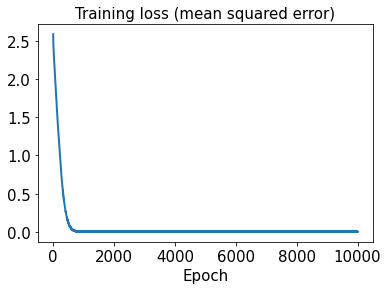

In [33]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

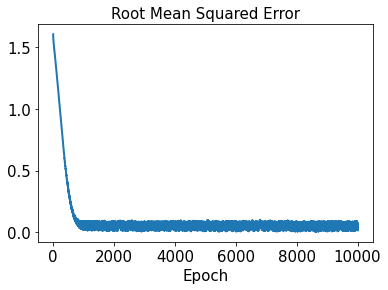

In [34]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [35]:
decoded_sensor_train2 = sensor_pred2.predict(t_train)

In [36]:
decoded_sensor_test2 = sensor_pred2.predict(t_test)

In [37]:
error_train_abs2 = np.abs(decoded_sensor_train2 - x_train2)

In [38]:
error_test_abs2 = np.abs(decoded_sensor_test2 - x_test2)

In [39]:
l2_error_sensor_train2 = np.sqrt(np.sum((decoded_sensor_train2 - x_train2)**2) / np.sum(x_train2**2))
print(l2_error_sensor_train2)

0.0312350815354437


In [40]:
l2_error_sensor_test2 = np.sqrt(np.sum((decoded_sensor_test2 - x_test2)**2) / np.sum(x_test2**2))
print(l2_error_sensor_test2)

0.0332976241375


In [41]:
sensor_pred3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [42]:
start3 = datetime.datetime.now()
history3 = sensor_pred3.fit(t_train, x_train3, epochs=10000)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 13ms/step - loss: 3.8174 - rmse: 1.9538
Epoch 2/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.7671 - rmse: 1.9409
Epoch 3/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.7286 - rmse: 1.9310
Epoch 4/10000
2/2 [==============================] - 0s 18ms/step - loss: 3.6976 - rmse: 1.9229
Epoch 5/10000
2/2 [==============================] - 0s 30ms/step - loss: 3.6723 - rmse: 1.9163
Epoch 6/10000
2/2 [==============================] - 0s 21ms/step - loss: 3.6494 - rmse: 1.9103
Epoch 7/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6277 - rmse: 1.9046
Epoch 8/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.6069 - rmse: 1.8992
Epoch 9/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.5852 - rmse: 1.8935
Epoch 10/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.5642 - rmse: 1.8879
Epoch 11/10000
2/2 [===================

2/2 [==============================] - 0s 9ms/step - loss: 2.5010 - rmse: 1.5814
Epoch 87/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4906 - rmse: 1.5781
Epoch 88/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4800 - rmse: 1.5748
Epoch 89/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4778 - rmse: 1.5741
Epoch 90/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4590 - rmse: 1.5681
Epoch 91/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4498 - rmse: 1.5652
Epoch 92/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4379 - rmse: 1.5614
Epoch 93/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4287 - rmse: 1.5584
Epoch 94/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4168 - rmse: 1.5546
Epoch 95/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4087 - rmse: 1.5520
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 8ms/step - loss: 1.7496 - rmse: 1.3227
Epoch 171/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7440 - rmse: 1.3206
Epoch 172/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7358 - rmse: 1.3175
Epoch 173/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7310 - rmse: 1.3156
Epoch 174/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7240 - rmse: 1.3130
Epoch 175/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7137 - rmse: 1.3091
Epoch 176/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7087 - rmse: 1.3071
Epoch 177/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6985 - rmse: 1.3033
Epoch 178/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6932 - rmse: 1.3012
Epoch 179/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6879 - rmse: 1.2992
Epoch 180/10000
2/2 [====================

2/2 [==============================] - 0s 12ms/step - loss: 1.2147 - rmse: 1.1021
Epoch 255/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2084 - rmse: 1.0992
Epoch 256/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2059 - rmse: 1.0981
Epoch 257/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1969 - rmse: 1.0940
Epoch 258/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1923 - rmse: 1.0919
Epoch 259/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1883 - rmse: 1.0901
Epoch 260/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1803 - rmse: 1.0864
Epoch 261/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1752 - rmse: 1.0841
Epoch 262/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1725 - rmse: 1.0828
Epoch 263/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1647 - rmse: 1.0792
Epoch 264/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.8157 - rmse: 0.9031
Epoch 339/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8124 - rmse: 0.9013
Epoch 340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8105 - rmse: 0.9002
Epoch 341/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8040 - rmse: 0.8967
Epoch 342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8008 - rmse: 0.8949
Epoch 343/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7955 - rmse: 0.8919
Epoch 344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7925 - rmse: 0.8902
Epoch 345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7931 - rmse: 0.8906
Epoch 346/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7837 - rmse: 0.8852
Epoch 347/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7799 - rmse: 0.8831
Epoch 348/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.5218 - rmse: 0.7224
Epoch 423/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5188 - rmse: 0.7202
Epoch 424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5147 - rmse: 0.7174
Epoch 425/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5156 - rmse: 0.7180
Epoch 426/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5105 - rmse: 0.7145
Epoch 427/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5060 - rmse: 0.7113
Epoch 428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5056 - rmse: 0.7110
Epoch 429/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5011 - rmse: 0.7078
Epoch 430/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4971 - rmse: 0.7051
Epoch 431/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4973 - rmse: 0.7052
Epoch 432/10000
2/2 [==================

2/2 [==============================] - 0s 11ms/step - loss: 0.3046 - rmse: 0.5518
Epoch 507/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3014 - rmse: 0.5490
Epoch 508/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.3063 - rmse: 0.5534
Epoch 509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2956 - rmse: 0.5437
Epoch 510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2934 - rmse: 0.5416
Epoch 511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2917 - rmse: 0.5400
Epoch 512/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2934 - rmse: 0.5416
Epoch 513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2885 - rmse: 0.5371
Epoch 514/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2876 - rmse: 0.5363
Epoch 515/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2838 - rmse: 0.5327
Epoch 516/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.1638 - rmse: 0.4047
Epoch 591/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1649 - rmse: 0.4060
Epoch 592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1600 - rmse: 0.3999
Epoch 593/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1582 - rmse: 0.3976
Epoch 594/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1575 - rmse: 0.3968
Epoch 595/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1579 - rmse: 0.3974
Epoch 596/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1556 - rmse: 0.3945
Epoch 597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1531 - rmse: 0.3913
Epoch 598/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1550 - rmse: 0.3936
Epoch 599/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1530 - rmse: 0.3910
Epoch 600/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.0805 - rmse: 0.2836
Epoch 675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0805 - rmse: 0.2837
Epoch 676/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0777 - rmse: 0.2786
Epoch 677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0781 - rmse: 0.2794
Epoch 678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0749 - rmse: 0.2736
Epoch 679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0746 - rmse: 0.2731
Epoch 680/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0733 - rmse: 0.2707
Epoch 681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0750 - rmse: 0.2738
Epoch 682/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0720 - rmse: 0.2683
Epoch 683/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0800 - rmse: 0.2828
Epoch 684/10000
2/2 [==================

2/2 [==============================] - 0s 8ms/step - loss: 0.0333 - rmse: 0.1822
Epoch 759/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - rmse: 0.1891
Epoch 760/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0325 - rmse: 0.1803
Epoch 761/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0345 - rmse: 0.1855
Epoch 762/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0337 - rmse: 0.1836
Epoch 763/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0343 - rmse: 0.1850
Epoch 764/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0333 - rmse: 0.1825
Epoch 765/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0378 - rmse: 0.1944
Epoch 766/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0300 - rmse: 0.1732
Epoch 767/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0305 - rmse: 0.1746
Epoch 768/10000
2/2 [===================

2/2 [==============================] - 0s 12ms/step - loss: 0.0140 - rmse: 0.1182
Epoch 843/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0139 - rmse: 0.1177
Epoch 844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 845/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 846/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0142 - rmse: 0.1189
Epoch 847/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 848/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0136 - rmse: 0.1165
Epoch 849/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 850/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0144 - rmse: 0.1198
Epoch 851/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0116 - rmse: 0.1077
Epoch 852/10000
2/2 [===================

2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 927/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0761
Epoch 928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0109 - rmse: 0.1044
Epoch 929/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 930/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0803
Epoch 931/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0721
Epoch 932/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0884
Epoch 933/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 934/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 935/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0787
Epoch 936/10000
2/2 [==================

2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 1010/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 1011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0093 - rmse: 0.0961
Epoch 1012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0559
Epoch 1013/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 1014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 1015/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 1016/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 1017/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 1018/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 1019/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 1092/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.9542e-04 - rmse: 0.0276
Epoch 1093/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 1094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 1095/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 1096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 1097/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0845
Epoch 1098/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 1099/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 1100/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 1101/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 1174/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 1175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 1176/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 1177/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.3953e-04 - rmse: 0.0266
Epoch 1178/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.9195e-04 - rmse: 0.0257
Epoch 1179/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0958
Epoch 1180/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 1181/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 1182/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0894
Epoch 1183/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 2.3270e-04 - rmse: 0.0142
Epoch 1256/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.4643e-05 - rmse: 0.0066
Epoch 1257/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.5706e-04 - rmse: 0.0206
Epoch 1258/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0522
Epoch 1259/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4512e-04 - rmse: 0.0177
Epoch 1260/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.5301e-04 - rmse: 0.0110
Epoch 1261/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0463
Epoch 1262/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5262e-04 - rmse: 0.0149
Epoch 1263/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 1264/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8388e-04 - rmse: 0.0188
Ep

2/2 [==============================] - 0s 12ms/step - loss: 1.3682e-04 - rmse: 0.0103
Epoch 1337/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.7988e-04 - rmse: 0.0187
Epoch 1338/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.7404e-04 - rmse: 0.0185
Epoch 1339/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.6082e-04 - rmse: 0.0152
Epoch 1340/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0087 - rmse: 0.0933
Epoch 1341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 1342/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 1343/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 1344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 1345/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 1346/100

2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 1418/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 1419/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 1420/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0932
Epoch 1421/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 1422/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0579
Epoch 1423/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8440e-04 - rmse: 0.0188
Epoch 1424/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 1425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 1426/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.8871e-04 - rmse: 0.0190
Epoch 1427/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 5.9629e-04 - rmse: 0.0238
Epoch 1500/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0091 - rmse: 0.0953
Epoch 1501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0952
Epoch 1502/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.4120e-04 - rmse: 0.0267
Epoch 1503/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.9983e-04 - rmse: 0.0217
Epoch 1504/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.6131e-04 - rmse: 0.0288
Epoch 1505/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 1506/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 1507/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 1508/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1571e-04 - rmse: 0.0262
Epoch 1509/10

2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 1582/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.2954e-04 - rmse: 0.0224
Epoch 1583/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0950
Epoch 1584/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.0005e-04 - rmse: 0.0239
Epoch 1585/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.9035e-04 - rmse: 0.0257
Epoch 1586/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 1587/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0952
Epoch 1588/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.3529e-04 - rmse: 0.0225
Epoch 1589/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 1590/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0091 - rmse: 0.0952
Epoch 1591/100

2/2 [==============================] - 0s 12ms/step - loss: 3.6023e-04 - rmse: 0.0182
Epoch 1664/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 1665/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 1666/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 1667/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3492e-05 - rmse: 0.0051
Epoch 1668/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.0076e-05 - rmse: 0.0065
Epoch 1669/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 1670/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 1671/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.2286e-04 - rmse: 0.0098
Epoch 1672/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 1673/100

2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 1746/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0550
Epoch 1747/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 1748/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 1749/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 1750/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 1751/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 1752/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.6513e-04 - rmse: 0.0232
Epoch 1753/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 1754/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 1755/10000
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0804
Epoch 1828/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 1829/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 1830/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2633e-04 - rmse: 0.0173
Epoch 1831/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 1832/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 1833/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.9730e-04 - rmse: 0.0165
Epoch 1834/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 1835/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 1836/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3686e-04 - rmse: 0.0267
Epoch 1837/10000
2/

2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0493
Epoch 1909/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.3688e-04 - rmse: 0.0176
Epoch 1910/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 1911/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 1912/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.2778e-04 - rmse: 0.0201
Epoch 1913/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 1914/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 1915/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 1916/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7769e-04 - rmse: 0.0213
Epoch 1917/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 1918/10000
2

2/2 [==============================] - 0s 9ms/step - loss: 2.0540e-04 - rmse: 0.0134
Epoch 1991/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 1992/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0088 - rmse: 0.0936
Epoch 1993/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 1994/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 1995/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 1996/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0088 - rmse: 0.0939
Epoch 1997/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.8780e-04 - rmse: 0.0162
Epoch 1998/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0557
Epoch 1999/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 2000/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 2073/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.0397e-04 - rmse: 0.0167
Epoch 2074/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.6037e-04 - rmse: 0.0289
Epoch 2075/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.5003e-04 - rmse: 0.0206
Epoch 2076/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.7191e-04 - rmse: 0.0157
Epoch 2077/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 2078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 2079/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 2080/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 2081/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 2082/100

2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 2155/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8372e-04 - rmse: 0.0276
Epoch 2156/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2738e-04 - rmse: 0.0201
Epoch 2157/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 2158/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 2159/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 2160/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 2161/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4551e-04 - rmse: 0.0229
Epoch 2162/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0930
Epoch 2163/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 2164/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0360
Epoch 2237/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.3005e-04 - rmse: 0.0175
Epoch 2238/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.0348e-04 - rmse: 0.0297
Epoch 2239/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 2240/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.4614e-04 - rmse: 0.0206
Epoch 2241/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0876
Epoch 2242/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.9910e-04 - rmse: 0.0240
Epoch 2243/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.6407e-04 - rmse: 0.0210
Epoch 2244/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0529
Epoch 2245/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 2246

2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 2319/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 2320/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 2321/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 2322/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.8719e-04 - rmse: 0.0294
Epoch 2323/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 2324/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 2325/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 2326/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.2282e-04 - rmse: 0.0173
Epoch 2327/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0803
Epoch 2328/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 2401/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 2402/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.2888e-05 - rmse: 0.0064
Epoch 2403/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 2404/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 2405/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 2406/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 2407/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2966e-05 - rmse: 0.0064
Epoch 2408/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0157e-04 - rmse: 0.0167
Epoch 2409/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0867
Epoch 2410/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 2483/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 2484/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0929
Epoch 2485/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 2486/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 2487/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0313
Epoch 2488/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 2489/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5158e-04 - rmse: 0.0114
Epoch 2490/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 2491/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 2492/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 4.8041e-04 - rmse: 0.0215
Epoch 2565/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0751
Epoch 2566/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0461
Epoch 2567/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0746e-05 - rmse: 0.0064
Epoch 2568/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.9990e-04 - rmse: 0.0134
Epoch 2569/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.4239e-04 - rmse: 0.0179
Epoch 2570/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 2571/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.1053e-04 - rmse: 0.0095
Epoch 2572/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0804
Epoch 2573/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.4983e-04 - rmse: 0.0270
Epoch 2

2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 2646/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 2647/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 2648/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 2649/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0588
Epoch 2650/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9969e-04 - rmse: 0.0219
Epoch 2651/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.2193e-04 - rmse: 0.0224
Epoch 2652/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 2653/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0611
Epoch 2654/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 2655/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 5.7423e-05 - rmse: 0.0062
Epoch 2728/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 2729/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 2730/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 2731/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.2076e-04 - rmse: 0.0300
Epoch 2732/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 2733/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 2734/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.8261e-04 - rmse: 0.0162
Epoch 2735/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0867
Epoch 2736/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 2737/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0871
Epoch 2810/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 2811/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.2043e-04 - rmse: 0.0265
Epoch 2812/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8814e-04 - rmse: 0.0130
Epoch 2813/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0851e-04 - rmse: 0.0095
Epoch 2814/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 2815/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 2816/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.7924e-05 - rmse: 0.0063
Epoch 2817/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0805
Epoch 2818/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0075 - rmse: 0.0865
Epoch 2819/100

2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 2892/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5150e-04 - rmse: 0.0289
Epoch 2893/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6104e-04 - rmse: 0.0120
Epoch 2894/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.1980e-04 - rmse: 0.0174
Epoch 2895/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0077 - rmse: 0.0876
Epoch 2896/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0534e-04 - rmse: 0.0221
Epoch 2897/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0813
Epoch 2898/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 2899/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9137e-04 - rmse: 0.0165
Epoch 2900/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 2901

2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 2974/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0532
Epoch 2975/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.6187e-04 - rmse: 0.0211
Epoch 2976/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0088 - rmse: 0.0939
Epoch 2977/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 2978/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0919e-04 - rmse: 0.0222
Epoch 2979/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2867e-04 - rmse: 0.0302
Epoch 2980/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 2981/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.1123e-04 - rmse: 0.0222
Epoch 2982/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 2983/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 3055/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 3056/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 3057/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.5250e-04 - rmse: 0.0306
Epoch 3058/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0625
Epoch 3059/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 3060/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 3061/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 3062/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 3063/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9866e-04 - rmse: 0.0168
Epoch 3064/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 3137/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 3138/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0715
Epoch 3139/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 3140/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 3141/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 3142/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0678
Epoch 3143/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 3144/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 3145/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0880
Epoch 3146/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 8.7558e-04 - rmse: 0.0293
Epoch 3219/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.4647e-04 - rmse: 0.0270
Epoch 3220/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8317e-04 - rmse: 0.0258
Epoch 3221/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 3222/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 3223/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 3224/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.5800e-04 - rmse: 0.0272
Epoch 3225/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 3226/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 3227/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 3228/100

2/2 [==============================] - 0s 8ms/step - loss: 9.8455e-04 - rmse: 0.0311
Epoch 3301/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0845
Epoch 3302/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 3303/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 3304/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 3305/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 3306/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 3307/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 3308/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.8821e-04 - rmse: 0.0193
Epoch 3309/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 3310/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 3383/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 3384/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 3385/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.4080e-04 - rmse: 0.0150
Epoch 3386/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0463
Epoch 3387/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5463e-04 - rmse: 0.0118
Epoch 3388/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0932
Epoch 3389/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 3390/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 3391/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 3392/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 3465/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 3466/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 3467/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 3468/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0952e-04 - rmse: 0.0264
Epoch 3469/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 3470/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 3471/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 3472/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.6243e-04 - rmse: 0.0254
Epoch 3473/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 3474/10000
2/2 [

2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 3547/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3785e-04 - rmse: 0.0111
Epoch 3548/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 3549/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0381e-04 - rmse: 0.0094
Epoch 3550/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 3551/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 3552/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 3553/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.9819e-04 - rmse: 0.0220
Epoch 3554/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.2231e-04 - rmse: 0.0284
Epoch 3555/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 3556/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 3629/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0931
Epoch 3630/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0807
Epoch 3631/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 3632/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5685e-04 - rmse: 0.0233
Epoch 3633/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.2798e-04 - rmse: 0.0146
Epoch 3634/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7564e-04 - rmse: 0.0127
Epoch 3635/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 3636/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 3637/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 3638/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 2.8855e-04 - rmse: 0.0166
Epoch 3711/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.3500e-04 - rmse: 0.0110
Epoch 3712/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 3713/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 3714/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 3715/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2060e-04 - rmse: 0.0103
Epoch 3716/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 3717/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.9323e-04 - rmse: 0.0313
Epoch 3718/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 3719/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.4019e-04 - rmse: 0.0181
Epoch 3720

2/2 [==============================] - 0s 12ms/step - loss: 1.4549e-04 - rmse: 0.0115
Epoch 3792/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.8943e-04 - rmse: 0.0279
Epoch 3793/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 3794/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.5965e-04 - rmse: 0.0186
Epoch 3795/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 3796/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.9648e-04 - rmse: 0.0135
Epoch 3797/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 3798/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.3019e-04 - rmse: 0.0178
Epoch 3799/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 3800/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.0861e-04 - rmse: 0.0299
Epoch 

2/2 [==============================] - 0s 12ms/step - loss: 2.2808e-04 - rmse: 0.0146
Epoch 3874/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 3875/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 3876/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.1251e-04 - rmse: 0.0173
Epoch 3877/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4726e-04 - rmse: 0.0183
Epoch 3878/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 3879/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 3880/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0463
Epoch 3881/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1182e-04 - rmse: 0.0141
Epoch 3882/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.4836e-04 - rmse: 0.0306
Epoch 3883

2/2 [==============================] - 0s 8ms/step - loss: 9.7741e-04 - rmse: 0.0311
Epoch 3956/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0625
Epoch 3957/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 3958/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0355e-05 - rmse: 0.0052
Epoch 3959/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.0235e-05 - rmse: 0.0027
Epoch 3960/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8844e-04 - rmse: 0.0132
Epoch 3961/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 3962/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 3963/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7771e-05 - rmse: 0.0059
Epoch 3964/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 3965/

2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 4037/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 4038/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4307e-04 - rmse: 0.0207
Epoch 4039/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 4040/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0018e-04 - rmse: 0.0093
Epoch 4041/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 4042/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 4043/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 4044/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 4045/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 4046/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 4119/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 4120/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 4121/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.3582e-04 - rmse: 0.0304
Epoch 4122/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 4123/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 4124/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 4125/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 4126/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 4127/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 4128/10000
2/2 [====

2/2 [==============================] - 0s 9ms/step - loss: 7.2602e-04 - rmse: 0.0267
Epoch 4201/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.3697e-04 - rmse: 0.0269
Epoch 4202/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0627
Epoch 4203/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 4204/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.2472e-04 - rmse: 0.0177
Epoch 4205/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0625
Epoch 4206/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 4207/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 4208/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.3188e-04 - rmse: 0.0268
Epoch 4209/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 4210/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 4283/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 4284/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 4285/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.4572e-04 - rmse: 0.0306
Epoch 4286/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.4351e-04 - rmse: 0.0270
Epoch 4287/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0086 - rmse: 0.0929
Epoch 4288/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9074e-04 - rmse: 0.0195
Epoch 4289/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.1206e-05 - rmse: 0.0089
Epoch 4290/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 4291/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9578e-04 - rmse: 0.0135
Epoch 4292/

2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 4365/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 4366/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4750e-04 - rmse: 0.0231
Epoch 4367/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0825
Epoch 4368/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0658
Epoch 4369/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 4370/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.6415e-04 - rmse: 0.0292
Epoch 4371/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0500
Epoch 4372/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3583e-04 - rmse: 0.0269
Epoch 4373/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 4374/10000
2

2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0586
Epoch 4447/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 4448/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 4449/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 4450/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6074e-04 - rmse: 0.0187
Epoch 4451/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 4452/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 4453/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 4454/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 4455/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 4456/10000
2/2 [====

2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0657
Epoch 4529/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.9038e-04 - rmse: 0.0195
Epoch 4530/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0825
Epoch 4531/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.4859e-04 - rmse: 0.0184
Epoch 4532/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.2882e-04 - rmse: 0.0204
Epoch 4533/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 4534/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 4535/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 4536/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 4537/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 4538/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0579
Epoch 4611/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 4612/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 4613/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4913e-04 - rmse: 0.0117
Epoch 4614/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 4615/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 4616/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 4617/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 4618/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 4619/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 4620/10000
2/2 [====

2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 4693/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 4694/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 4695/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0092 - rmse: 0.0961
Epoch 4696/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0603
Epoch 4697/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 4698/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 4699/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 4700/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0899
Epoch 4701/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 4702/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 2.6746e-04 - rmse: 0.0160
Epoch 4775/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 4776/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 4777/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 4778/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 4779/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 4780/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 4781/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 4782/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 4783/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 4784/10000
2/2 [=====

2/2 [==============================] - 0s 9ms/step - loss: 7.5499e-04 - rmse: 0.0273
Epoch 4857/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 4858/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 4859/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0681
Epoch 4860/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 4861/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 4862/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 4863/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0533
Epoch 4864/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 4865/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.4088e-04 - rmse: 0.0305
Epoch 4866/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 4939/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 4940/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 4941/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 4942/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0887
Epoch 4943/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 4944/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.8932e-04 - rmse: 0.0219
Epoch 4945/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 4946/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 4947/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0879
Epoch 4948/10000
2/2 [====

2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 5021/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.4800e-04 - rmse: 0.0289
Epoch 5022/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.0693e-04 - rmse: 0.0140
Epoch 5023/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0872
Epoch 5024/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4653e-04 - rmse: 0.0231
Epoch 5025/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 5026/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 5027/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 5028/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 5029/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.6437e-05 - rmse: 0.0093
Epoch 5030/1000

2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 5103/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 5104/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 5105/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.5030e-04 - rmse: 0.0184
Epoch 5106/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 5107/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 5108/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 5109/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0070 - rmse: 0.0834
Epoch 5110/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 5111/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 5112/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 5185/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 5186/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 5187/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.0456e-04 - rmse: 0.0139
Epoch 5188/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 5189/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 5190/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 5191/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 5192/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 5193/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6940e-04 - rmse: 0.0161
Epoch 5194/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 6.5046e-04 - rmse: 0.0253
Epoch 5267/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0617
Epoch 5268/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8047e-04 - rmse: 0.0259
Epoch 5269/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 5270/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6380e-04 - rmse: 0.0274
Epoch 5271/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1535e-04 - rmse: 0.0225
Epoch 5272/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0442e-04 - rmse: 0.0222
Epoch 5273/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 5274/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1281e-04 - rmse: 0.0201
Epoch 5275/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 52

2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0868
Epoch 5349/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0807
Epoch 5350/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 5351/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 5352/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.5989e-04 - rmse: 0.0308
Epoch 5353/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.8838e-04 - rmse: 0.0313
Epoch 5354/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.2359e-04 - rmse: 0.0146
Epoch 5355/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 5356/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 5357/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0322
Epoch 5358/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 5431/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.8880e-04 - rmse: 0.0313
Epoch 5432/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0087 - rmse: 0.0934
Epoch 5433/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0379
Epoch 5434/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0087 - rmse: 0.0932
Epoch 5435/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.5908e-04 - rmse: 0.0187
Epoch 5436/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 5437/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 5438/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 5439/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.2961e-05 - rmse: 0.0085
Epoch 5440/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 5513/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 5514/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2028e-04 - rmse: 0.0203
Epoch 5515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0807
Epoch 5516/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 5517/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0040e-04 - rmse: 0.0095
Epoch 5518/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0087 - rmse: 0.0931
Epoch 5519/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.4149e-05 - rmse: 0.0092
Epoch 5520/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0064 - rmse: 0.0802
Epoch 5521/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8797e-04 - rmse: 0.0167
Epoch 5522/1000

2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 5595/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0566e-05 - rmse: 0.0084
Epoch 5596/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1300e-04 - rmse: 0.0201
Epoch 5597/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.0983e-04 - rmse: 0.0300
Epoch 5598/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 5599/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.7344e-04 - rmse: 0.0128
Epoch 5600/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 5601/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0349e-04 - rmse: 0.0097
Epoch 5602/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.1075e-04 - rmse: 0.0300
Epoch 5603/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 

2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 5677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 5678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 5679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 5680/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.7005e-04 - rmse: 0.0127
Epoch 5681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0578
Epoch 5682/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 5683/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.7293e-04 - rmse: 0.0215
Epoch 5684/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5167e-04 - rmse: 0.0155
Epoch 5685/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 5686/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 5759/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 5760/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 5761/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.1117e-04 - rmse: 0.0265
Epoch 5762/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0643
Epoch 5763/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 5764/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.2002e-04 - rmse: 0.0266
Epoch 5765/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 5766/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 5767/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 5768/10000
2/2 [

2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0586
Epoch 5841/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 5842/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.2547e-04 - rmse: 0.0178
Epoch 5843/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 5844/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6919e-04 - rmse: 0.0190
Epoch 5845/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.7671e-05 - rmse: 0.0094
Epoch 5846/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0404
Epoch 5847/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 5848/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 5849/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 5850/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 5923/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 5924/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 5925/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 5926/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 5927/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 5928/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.4874e-04 - rmse: 0.0272
Epoch 5929/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0603
Epoch 5930/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.2044e-04 - rmse: 0.0267
Epoch 5931/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.1994e-04 - rmse: 0.0285
Epoch 5932/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 0.0077 - rmse: 0.0879
Epoch 6005/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9929e-04 - rmse: 0.0197
Epoch 6006/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0449
Epoch 6007/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 6008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0939
Epoch 6009/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 6010/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0633
Epoch 6011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 6012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0818
Epoch 6013/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9144e-04 - rmse: 0.0135
Epoch 6014/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0695
Epoch 6087/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0854
Epoch 6088/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 6089/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0715
Epoch 6090/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 6091/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0098 - rmse: 0.0991
Epoch 6092/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 6093/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 6094/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0099 - rmse: 0.0992
Epoch 6095/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0098 - rmse: 0.0987
Epoch 6096/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 6169/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 6170/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 6171/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.0645e-05 - rmse: 0.0078
Epoch 6172/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 6173/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4356e-04 - rmse: 0.0153
Epoch 6174/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0037e-04 - rmse: 0.0222
Epoch 6175/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0754
Epoch 6176/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0584
Epoch 6177/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 6178/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 6251/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6629e-04 - rmse: 0.0125
Epoch 6252/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 6253/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 6254/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 6255/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 6256/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 6257/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 6258/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 6259/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 6260/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 4.2228e-04 - rmse: 0.0203
Epoch 6333/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 6334/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0931
Epoch 6335/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0627
Epoch 6336/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0805
Epoch 6337/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 6338/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9414e-05 - rmse: 0.0095
Epoch 6339/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 6340/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.6177e-05 - rmse: 0.0061
Epoch 6341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 6342/10000
2/

2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 6414/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0881
Epoch 6415/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 6416/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 6417/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.7374e-04 - rmse: 0.0191
Epoch 6418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0759
Epoch 6419/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 6420/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.9793e-04 - rmse: 0.0221
Epoch 6421/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 6422/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2982e-04 - rmse: 0.0179
Epoch 6423/10000
2/

2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 6496/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9812e-04 - rmse: 0.0170
Epoch 6497/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 6498/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 6499/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 6500/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 6501/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 6502/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 6503/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.2928e-04 - rmse: 0.0228
Epoch 6504/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.0595e-04 - rmse: 0.0172
Epoch 6505/10000
2/

2/2 [==============================] - 0s 13ms/step - loss: 0.0094 - rmse: 0.0968
Epoch 6578/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 6579/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3103e-04 - rmse: 0.0304
Epoch 6580/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 6581/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0542
Epoch 6582/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 6583/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0953
Epoch 6584/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0091 - rmse: 0.0952
Epoch 6585/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 6586/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0542
Epoch 6587/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 6660/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 6661/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 6662/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 6663/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.1489e-04 - rmse: 0.0284
Epoch 6664/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0552
Epoch 6665/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6830e-04 - rmse: 0.0126
Epoch 6666/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 6667/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.7617e-04 - rmse: 0.0163
Epoch 6668/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 6669/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 6742/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2158e-04 - rmse: 0.0146
Epoch 6743/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.2031e-04 - rmse: 0.0226
Epoch 6744/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0579
Epoch 6745/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9005e-04 - rmse: 0.0313
Epoch 6746/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 6747/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.2195e-04 - rmse: 0.0146
Epoch 6748/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 6749/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 6750/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 6751/1000

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0353
Epoch 6824/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0759
Epoch 6825/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.6015e-04 - rmse: 0.0255
Epoch 6826/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7659e-04 - rmse: 0.0238
Epoch 6827/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7487e-04 - rmse: 0.0163
Epoch 6828/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0658
Epoch 6829/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 6830/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 6831/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 6832/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 6833/10000
2/

2/2 [==============================] - 0s 13ms/step - loss: 9.2675e-04 - rmse: 0.0303
Epoch 6906/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 6907/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 6908/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 6909/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0524
Epoch 6910/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 6911/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0529
Epoch 6912/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 6913/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 6914/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 6915/10000
2/2 [===

2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 6988/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.4073e-04 - rmse: 0.0305
Epoch 6989/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 6990/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 6991/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 6992/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 6993/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 6994/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 6995/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 6996/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 6997/10000
2/2 [====

2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 7070/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 7071/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 7072/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.8624e-04 - rmse: 0.0133
Epoch 7073/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 7074/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 7075/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0876
Epoch 7076/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 7077/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7178e-04 - rmse: 0.0162
Epoch 7078/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 7079/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 7152/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 7153/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8293e-04 - rmse: 0.0166
Epoch 7154/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 7155/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 7156/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 7157/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 7158/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2144e-04 - rmse: 0.0106
Epoch 7159/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 7160/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 7161/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 7234/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 7235/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 7236/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 7237/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 7238/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 7239/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 7240/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.3278e-04 - rmse: 0.0150
Epoch 7241/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0756
Epoch 7242/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.9821e-04 - rmse: 0.0243
Epoch 7243/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 7316/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0657
Epoch 7317/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2883e-04 - rmse: 0.0228
Epoch 7318/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.1206e-04 - rmse: 0.0246
Epoch 7319/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 7320/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 7321/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 7322/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 7323/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0441
Epoch 7324/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 7325/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 9.2287e-04 - rmse: 0.0302
Epoch 7398/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 7399/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 7400/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 7401/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0429
Epoch 7402/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1000e-04 - rmse: 0.0224
Epoch 7403/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 7404/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 7405/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4161e-04 - rmse: 0.0153
Epoch 7406/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 7407/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 2.0398e-04 - rmse: 0.0140
Epoch 7480/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5681e-04 - rmse: 0.0187
Epoch 7481/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.4084e-04 - rmse: 0.0182
Epoch 7482/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 7483/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0417
Epoch 7484/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 7485/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 7486/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 7487/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0848e-04 - rmse: 0.0100
Epoch 7488/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.7908e-04 - rmse: 0.0131
Epoch 7489/

2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0759
Epoch 7562/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.2172e-04 - rmse: 0.0302
Epoch 7563/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0877
Epoch 7564/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 7565/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.1724e-04 - rmse: 0.0176
Epoch 7566/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0824
Epoch 7567/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 7568/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 7569/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.5970e-04 - rmse: 0.0212
Epoch 7570/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.5920e-04 - rmse: 0.0274
Epoch 7571/100

2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 7644/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 7645/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1251e-04 - rmse: 0.0143
Epoch 7646/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 7647/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9900e-04 - rmse: 0.0315
Epoch 7648/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.9337e-04 - rmse: 0.0220
Epoch 7649/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 7650/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 7651/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 7652/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 7653/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 7725/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8045e-04 - rmse: 0.0278
Epoch 7726/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 7727/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 7728/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 7729/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 7730/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 7731/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3937e-04 - rmse: 0.0305
Epoch 7732/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 7733/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 7734/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 7807/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 7808/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 7809/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4890e-04 - rmse: 0.0307
Epoch 7810/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 7811/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6042e-04 - rmse: 0.0123
Epoch 7812/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7167e-04 - rmse: 0.0162
Epoch 7813/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.3879e-04 - rmse: 0.0207
Epoch 7814/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 7815/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 7816/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 7889/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.5752e-04 - rmse: 0.0212
Epoch 7890/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0186e-04 - rmse: 0.0171
Epoch 7891/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 7892/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0078 - rmse: 0.0880
Epoch 7893/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 7894/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 7895/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 7896/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.9397e-04 - rmse: 0.0262
Epoch 7897/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.9291e-04 - rmse: 0.0242
Epoch 7898/100

2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0620
Epoch 7971/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 7972/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 7973/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7974/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 7975/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 7976/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 7977/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 7978/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 7979/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 7980/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 8053/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 8054/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6785e-04 - rmse: 0.0214
Epoch 8055/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0404
Epoch 8056/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 8057/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 8058/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.4693e-04 - rmse: 0.0184
Epoch 8059/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 8060/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 8061/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 8062/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 1.2219e-04 - rmse: 0.0107
Epoch 8135/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 8136/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 8137/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6866e-04 - rmse: 0.0127
Epoch 8138/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0635
Epoch 8139/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0798e-04 - rmse: 0.0100
Epoch 8140/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.6344e-05 - rmse: 0.0088
Epoch 8141/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.0653e-05 - rmse: 0.0072
Epoch 8142/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 8143/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 8144/

Epoch 8216/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 8217/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 8218/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 8219/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3081e-04 - rmse: 0.0111
Epoch 8220/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 8221/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9313e-04 - rmse: 0.0136
Epoch 8222/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.0840e-05 - rmse: 0.0091
Epoch 8223/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 8224/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6310e-04 - rmse: 0.0160
Epoch 8225/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5961e-05 - rmse: 0

2/2 [==============================] - 0s 12ms/step - loss: 6.4887e-04 - rmse: 0.0253
Epoch 8298/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 8299/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 8300/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 8301/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 8302/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 8303/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 8304/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.8932e-04 - rmse: 0.0280
Epoch 8305/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 8306/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 8307/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 9.4217e-04 - rmse: 0.0306
Epoch 8380/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 8381/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 8382/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.9819e-04 - rmse: 0.0221
Epoch 8383/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5324e-04 - rmse: 0.0186
Epoch 8384/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 8385/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0758
Epoch 8386/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 8387/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.6104e-04 - rmse: 0.0292
Epoch 8388/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 8389/100

2/2 [==============================] - 0s 12ms/step - loss: 4.2784e-05 - rmse: 0.0059
Epoch 8462/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6079e-04 - rmse: 0.0124
Epoch 8463/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0806
Epoch 8464/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 8465/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 8466/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.3131e-05 - rmse: 0.0092
Epoch 8467/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 8468/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7749e-05 - rmse: 0.0054
Epoch 8469/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.3363e-04 - rmse: 0.0304
Epoch 8470/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7980e-04 - rmse: 0.0131
Epoch 

2/2 [==============================] - 0s 12ms/step - loss: 2.7170e-04 - rmse: 0.0162
Epoch 8543/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 8544/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 8545/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 8546/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 8547/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.8811e-04 - rmse: 0.0313
Epoch 8548/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.0725e-05 - rmse: 0.0085
Epoch 8549/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6470e-04 - rmse: 0.0125
Epoch 8550/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 8551/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 8552/100

2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 8625/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0429
Epoch 8626/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1634e-04 - rmse: 0.0266
Epoch 8627/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.6583e-04 - rmse: 0.0256
Epoch 8628/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 8629/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 8630/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 8631/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0838
Epoch 8632/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 8633/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.5355e-04 - rmse: 0.0308
Epoch 8634/10000
2

2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 8707/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 8708/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 8709/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0603
Epoch 8710/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9104e-04 - rmse: 0.0168
Epoch 8711/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 8712/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0877
Epoch 8713/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 8714/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 8715/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 8716/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 2.5032e-04 - rmse: 0.0156
Epoch 8789/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 8790/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.3359e-04 - rmse: 0.0250
Epoch 8791/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 8792/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0417
Epoch 8793/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0955
Epoch 8794/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.9200e-04 - rmse: 0.0280
Epoch 8795/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 8796/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 8797/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0366
Epoch 8798/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 8871/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9549e-04 - rmse: 0.0197
Epoch 8872/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4811e-04 - rmse: 0.0210
Epoch 8873/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 8874/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 8875/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.4943e-04 - rmse: 0.0233
Epoch 8876/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0542
Epoch 8877/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 8878/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.8285e-04 - rmse: 0.0218
Epoch 8879/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 8880/100

2/2 [==============================] - 0s 9ms/step - loss: 4.6446e-04 - rmse: 0.0214
Epoch 8952/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 8953/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 8954/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0659
Epoch 8955/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 8956/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 8957/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.4990e-04 - rmse: 0.0307
Epoch 8958/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 8959/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 8960/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0819
Epoch 8961/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 9034/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 9035/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 9036/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0429
Epoch 9037/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.9148e-04 - rmse: 0.0220
Epoch 9038/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3031e-04 - rmse: 0.0229
Epoch 9039/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 9040/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 9041/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1387e-04 - rmse: 0.0202
Epoch 9042/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0822
Epoch 9043/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0758
Epoch 9116/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 9117/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0643
Epoch 9118/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 9119/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.4277e-04 - rmse: 0.0153
Epoch 9120/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 9121/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 9122/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 9123/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0088 - rmse: 0.0937
Epoch 9124/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8821e-04 - rmse: 0.0134
Epoch 9125/10000
2/2 [

2/2 [==============================] - 0s 7ms/step - loss: 9.0768e-04 - rmse: 0.0300
Epoch 9198/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.9761e-04 - rmse: 0.0138
Epoch 9199/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.5929e-04 - rmse: 0.0274
Epoch 9200/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 9201/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.6151e-04 - rmse: 0.0159
Epoch 9202/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3844e-04 - rmse: 0.0152
Epoch 9203/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 9204/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 9205/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0603
Epoch 9206/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 9207/

2/2 [==============================] - 0s 8ms/step - loss: 2.1758e-04 - rmse: 0.0145
Epoch 9280/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 9281/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.2355e-04 - rmse: 0.0178
Epoch 9282/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 9283/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0879
Epoch 9284/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 9285/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 9286/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0761
Epoch 9287/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 9288/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 9289/10000
2/2 [==

2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0932
Epoch 9362/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.1582e-05 - rmse: 0.0073
Epoch 9363/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 9364/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3856e-04 - rmse: 0.0208
Epoch 9365/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0065 - rmse: 0.0808
Epoch 9366/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 9367/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 9368/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9369/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0578
Epoch 9370/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 9371/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0895
Epoch 9444/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.3106e-04 - rmse: 0.0250
Epoch 9445/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 9446/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 9447/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 9448/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 9449/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 9450/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0890
Epoch 9451/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0603
Epoch 9452/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 9453/10000
2/2 [====

2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 9526/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2403e-04 - rmse: 0.0248
Epoch 9527/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 9528/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.7776e-04 - rmse: 0.0277
Epoch 9529/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1839e-04 - rmse: 0.0302
Epoch 9530/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.9244e-04 - rmse: 0.0262
Epoch 9531/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 9532/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4757e-04 - rmse: 0.0307
Epoch 9533/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 9534/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 9535

2/2 [==============================] - 0s 8ms/step - loss: 6.3219e-04 - rmse: 0.0250
Epoch 9608/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 9609/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 9610/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 9611/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 9612/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 9613/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 9614/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0696
Epoch 9615/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0084 - rmse: 0.0917
Epoch 9616/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 9617/10000
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0578
Epoch 9691/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0805
Epoch 9692/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 9693/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 9694/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 9695/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 9696/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 9697/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 9698/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 9699/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0099 - rmse: 0.0993
Epoch 9700/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 7.1746e-04 - rmse: 0.0266
Epoch 9773/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.2340e-04 - rmse: 0.0178
Epoch 9774/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 9775/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9787e-04 - rmse: 0.0170
Epoch 9776/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1510e-04 - rmse: 0.0104
Epoch 9777/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0905e-04 - rmse: 0.0101
Epoch 9778/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 9779/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 9780/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.0610e-04 - rmse: 0.0141
Epoch 9781/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 9

2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 9855/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.2784e-04 - rmse: 0.0148
Epoch 9856/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.7000e-04 - rmse: 0.0215
Epoch 9857/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 9858/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0755
Epoch 9859/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 9860/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0757
Epoch 9861/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 9862/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.3586e-04 - rmse: 0.0207
Epoch 9863/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0657
Epoch 9864/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0322
Epoch 9937/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 9938/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6419e-04 - rmse: 0.0275
Epoch 9939/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.5610e-04 - rmse: 0.0274
Epoch 9940/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0867
Epoch 9941/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 9942/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 9943/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 9944/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0582e-04 - rmse: 0.0264
Epoch 9945/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 9946/10000
2

In [43]:
time3_sensor = end3 - start3
print("Training time (Case 3, sensor prediction):", time3_sensor)

Training time (Case 3, sensor prediction): 0:03:42.868764


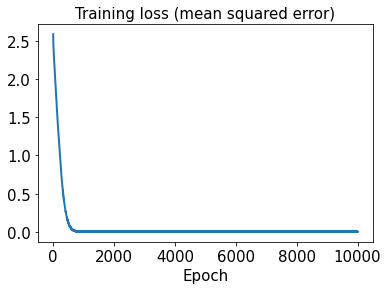

In [44]:
hist3 = history3.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

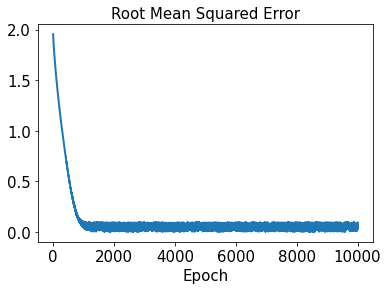

In [45]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [46]:
decoded_sensor_train3 = sensor_pred3.predict(t_train)

In [47]:
decoded_sensor_test3 = sensor_pred3.predict(t_test)

In [48]:
error_train_abs3 = np.abs(decoded_sensor_train3 - x_train3)

In [49]:
error_test_abs3 = np.abs(decoded_sensor_test3 - x_test3)

In [50]:
error_train_abs3

array([[[0.0322462 ],
        [0.02191005],
        [0.02168723],
        [0.03704038],
        [0.02249256],
        [0.01703455],
        [0.01601492],
        [0.02378971],
        [0.02584053],
        [0.01542871],
        [0.01822444],
        [0.02681545],
        [0.03282636],
        [0.02298657],
        [0.02163846],
        [0.03276437]],

       [[0.04712588],
        [0.02844375],
        [0.02978846],
        [0.05145766],
        [0.03251603],
        [0.01903277],
        [0.01855727],
        [0.03177177],
        [0.03414588],
        [0.02173878],
        [0.02077036],
        [0.03666809],
        [0.04581311],
        [0.02719717],
        [0.02956345],
        [0.0485312 ]],

       [[0.03253996],
        [0.02100814],
        [0.02113636],
        [0.03497175],
        [0.02205861],
        [0.01566804],
        [0.01601025],
        [0.02312614],
        [0.02354913],
        [0.01582634],
        [0.01705496],
        [0.02605776],
        [0.03125972],
      

In [51]:
l2_error_sensor_train3 = np.sqrt(np.sum((decoded_sensor_train3 - x_train3)**2) / np.sum(x_train3**2))
print(l2_error_sensor_train3)

0.027621883668149962


In [52]:
l2_error_sensor_test3 = np.sqrt(np.sum((decoded_sensor_test3 - x_test3)**2) / np.sum(x_test3**2))
print(l2_error_sensor_test3)

0.029690419404485788
